In [1]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

## For all the Image processing activity
import cv2

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

from sklearn.utils import shuffle

# Initialize the random number generator
import random

## train and test Data set split
from sklearn.model_selection import train_test_split

## Doing One hot encoding
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

## To unzip the Image Files

import zipfile

from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import gc

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

from sklearn.preprocessing import MultiLabelBinarizer

import random
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import LabelEncoder

##Vectorizier
from sklearn.feature_extraction.text import  TfidfVectorizer

##COlab Drive mount
from google.colab import drive


2.5.0


In [2]:
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

pd.options.display.max_colwidth=500
pd.options.display.max_info_rows = 100

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/NLP/Assignment/')

In [5]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/NLP/Assignment'

In [6]:
blog_df = pd.read_csv('blogtext.csv')

In [7]:
blog_df.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie urlLink mail Bryan Aaldering (me) urlLink mail
2,2059027,male,15,Student,Leo,"12,May,2004","In het kader van kernfusie op aarde: MAAK JE EIGEN WATERSTOFBOM How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An H-Bomb (humorous!) Date: 7 Feb 1994 07:41:14 GMT Organization: The University of Western Australia Original file dated 12th November 1990. Seemed to be a transcript of a 'Seven Days' article. Poorly formatted and corrupted. I have added the text between 'examine under a microscope' and 'malleable, ..."
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004","Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate instructions like: 'go to the site, click on the pop-audio button then choose...'. So, without further ado here is the link to 24-hour K-Pop urlLink audio and the urlLink video streaming. Enjoy."
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","I had an interesting conversation with my Dad this morning. We were talking about where Koreans put their money. Invariably, they have a lot of real estate and cash. (Cash would include short term investments under one year as well as savings accounts.) The reason? Real estate makes money here. A lot of money. I've seen surveys of Seoul real estate rising about 10-15% PER YEAR for long stretches, even after taking into account the 1997 Crisis (referred to as the IMF crisi..."
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","Somehow Coca-Cola has a way of summing up things so well. In the early 1970s they had as their flagship jingle 'I'd Like to Buy the World a Coke' (to the tune of 'I'd Like to Teach the World to Sing') that pretty much summed up the post-Woodstock era so well. It didn't add much to sales, but it was a catchy tune. In Korea Coke's theme is urlLink Stop Thinking. Feel it. which pretty much sums up a lot about Korea and Koreans. (Look at how relaxed that couple is, now that th..."
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country of extremes. Everything here seems fad-based. I think it may come from Korea's history. It has been invaded a reported 700 times over the years, and each time they got independence I imagine they had to move quickly to get to the next level before the next war or occupation. Lately (well, not really lately...in 1945) the Japanese Occupation ended. Then the Korean War occurred from 1950-3. After that there was turmoil, but in 1961 Park Chung ..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","Take a read of this news article from urlLink JoongAng Ilbo about North Korea's opinion on the scaling down of troops in Seoul and Korea (specifically, 3,600 troops are heading to Iraq and by the end of 2005 the current total of 37,000 should drop to about 24,500). North blasts U.S. troop cuts North Korea again blasted the United States yesterday for what it calls 'an increase of U.S. defense capabilities' after the planned relocation of 3,600 U.S. troops in South Korea to I..."
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004","I surf the English news sites a lot looking for tidbits on Korea and how foreigners (like me) view the 'Hermit Kingdom' but also as a way to keep up with this fast-moving place. Sometimes, though, one needs to check the veracity of the figures put in the papers...especially the local ones. Here are two examples of how the English version of the Kor

In [8]:
blog_df.shape

(681284, 7)

In [9]:
blog_df.describe(include='all')

,id,gender,age,topic,sign,date,text
count,6.812840e+05,681284,681284.000000,681284,681284,681284,681284
unique,NaN,2,NaN,40,12,2616,611652
top,NaN,male,NaN,indUnk,Cancer,"02,August,2004",urlLink
freq,NaN,345193,NaN,251015,65048,16544,445
mean,2.397802e+06,NaN,23.932326,NaN,NaN,NaN,NaN
std,1.247723e+06,NaN,7.786009,NaN,NaN,NaN,NaN
min,5.114000e+03,NaN,13.000000,NaN,NaN,NaN,NaN
25%,1.239610e+06,NaN,17.000000,NaN,NaN,NaN,NaN
50%,2.607577e+06,NaN,24.000000,NaN,NaN,NaN,NaN
75%,3.525660e+06,NaN,26.000000,NaN,NaN,NaN,NaN


# **Observations:**

- There are 681284 blogs with 2 Unique genders, 40 Unique Topics and 12 Signs.
- From the above stats we can conclude Male has most number of blobs. Nearly 345193 Males blogged.
- Topic mostly blogged is of indUnk. Nearly 251015 blogs speaks about indUnk.
- Sign with Cancer has most number of blogs.65048 Bloggers have the Sign as Cancer.
- On 2nd August 2004 there are more number of blogs. Nearly 16544 blogs are on 2nd August 2004.

male      345193
female    336091
Name: gender, dtype: int64


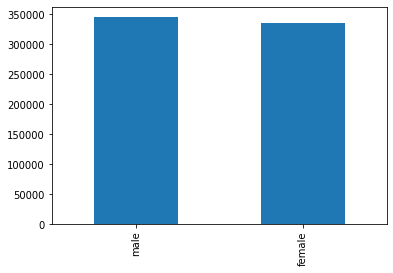

In [10]:
print(blog_df['gender'].value_counts())
blog_df['gender'].value_counts().sort_values(ascending=False).plot(kind='bar')

# **Observations:**

- There are 345193 Males and 336091 female Bloggers.

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

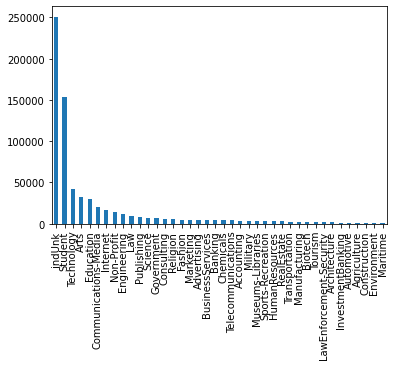

In [11]:
print(blog_df['topic'].value_counts())
blog_df['topic'].value_counts().sort_values(ascending=False).plot(kind='bar')

# **Observations:**
 - There are more number of topic on blogs is IndUnk
 - Second Highest is on topic Student.
 - Least blogged topic is Maritime.

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64


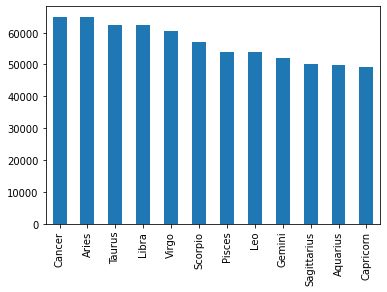

In [12]:
print(blog_df['sign'].value_counts())
blog_df['sign'].value_counts().sort_values(  ascending=False).plot(kind='bar')

# **Observations:**

- Bloggers with Cancer Sign are more in numbers.
- Bloggers with Capricon Sign are least in numbers.

17    80859
24    80071
23    72889
16    72708
25    67051
26    55312
27    46124
15    41767
14    27400
34    21347
33    17584
35    17462
36    14229
13    13133
37     9317
38     7545
39     5556
40     5016
45     4482
43     4230
41     3738
48     3572
42     2908
46     2733
47     2207
44     2044
Name: age, dtype: int64


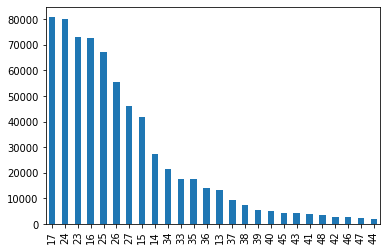

In [13]:
print(blog_df['age'].value_counts())
blog_df['age'].value_counts().sort_values(ascending=False).plot(kind='bar')

# **Observations:**

- Bloggers with 17 years age are more in numbers.
- Bloggers with 44 years age are less in numbers.

In [14]:
print(blog_df['date'].value_counts().head(20))

02,August,2004    16544
01,August,2004    13261
03,August,2004    11851
05,August,2004     9297
04,August,2004     8661
09,August,2004     7818
02,July,2004       7669
10,August,2004     7447
01,July,2004       6861
02,June,2004       6563
07,June,2004       6413
01,June,2004       6400
08,August,2004     6348
06,August,2004     6291
06,July,2004       5924
21,July,2004       5823
08,July,2004       5706
19,July,2004       5644
26,July,2004       5605
22,July,2004       5592
Name: date, dtype: int64


# **Observations:**

- There are more number of blogs as 16544 on 2nd August 2004

In [15]:
def age_range(x):
  if(x >12 and x < 20):
    return '10s'
  elif (x >19 and x <30):
    return '20s'
  elif (x >29 and x <40):
    return '30s'
  else:
    return '40s'

In [16]:
blog_df['Age_Range'] = blog_df['age'].apply(lambda x : age_range(x))

In [17]:
blog_df.head(10)

,id,gender,age,topic,sign,date,text,Age_Range
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.",10s
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie urlLink mail Bryan Aaldering (me) urlLink mail,10s
2,2059027,male,15,Student,Leo,"12,May,2004","In het kader van kernfusie op aarde: MAAK JE EIGEN WATERSTOFBOM How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An H-Bomb (humorous!) Date: 7 Feb 1994 07:41:14 GMT Organization: The University of Western Australia Original file dated 12th November 1990. Seemed to be a transcript of a 'Seven Days' article. Poorly formatted and corrupted. I have added the text between 'examine under a microscope' and 'malleable, ...",10s
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,10s
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004","Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate instructions like: 'go to the site, click on the pop-audio button then choose...'. So, without further ado here is the link to 24-hour K-Pop urlLink audio and the urlLink video streaming. Enjoy.",30s
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","I had an interesting conversation with my Dad this morning. We were talking about where Koreans put their money. Invariably, they have a lot of real estate and cash. (Cash would include short term investments under one year as well as savings accounts.) The reason? Real estate makes money here. A lot of money. I've seen surveys of Seoul real estate rising about 10-15% PER YEAR for long stretches, even after taking into account the 1997 Crisis (referred to as the IMF crisi...",30s
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","Somehow Coca-Cola has a way of summing up things so well. In the early 1970s they had as their flagship jingle 'I'd Like to Buy the World a Coke' (to the tune of 'I'd Like to Teach the World to Sing') that pretty much summed up the post-Woodstock era so well. It didn't add much to sales, but it was a catchy tune. In Korea Coke's theme is urlLink Stop Thinking. Feel it. which pretty much sums up a lot about Korea and Koreans. (Look at how relaxed that couple is, now that th...",30s
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country of extremes. Everything here seems fad-based. I think it may come from Korea's history. It has been invaded a reported 700 times over the years, and each time they got independence I imagine they had to move quickly to get to the next level before the next war or occupation. Lately (well, not really lately...in 1945) the Japanese Occupation ended. Then the Korean War occurred from 1950-3. After that there was turmoil, but in 1961 Park Chung ...",30s
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","Take a read of this news article from urlLink JoongAng Ilbo about North Korea's opinion on the scaling down of troops in Seoul and Korea (specifically, 3,600 troops are heading to Iraq and by the end of 2005 the current total of 37,000 should drop to about 24,500). North blasts U.S. troop cuts North Korea again blasted the United States yesterday for what it calls 'an increase of U.S. defense capabilities' after the planned relocation of 3,600 U.S. troops in South Korea to I...",30s
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004","I surf the English news sites a lot looking for tidbits on Korea and how foreigners (like me) view the 'Hermit Kingdom' but also as a way to keep up with this fast-moving place. Sometimes, though, one needs to check the veracity of the figures put in the papers...especially the local ones. Here are two 

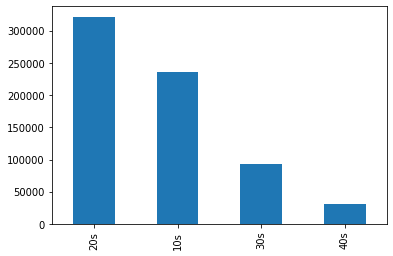

In [18]:
blog_df['Age_Range'].value_counts().sort_values(ascending=False).plot(kind='bar')

# **Observations:**

- Seeing the age range between 20 and 30 are more bloggers.


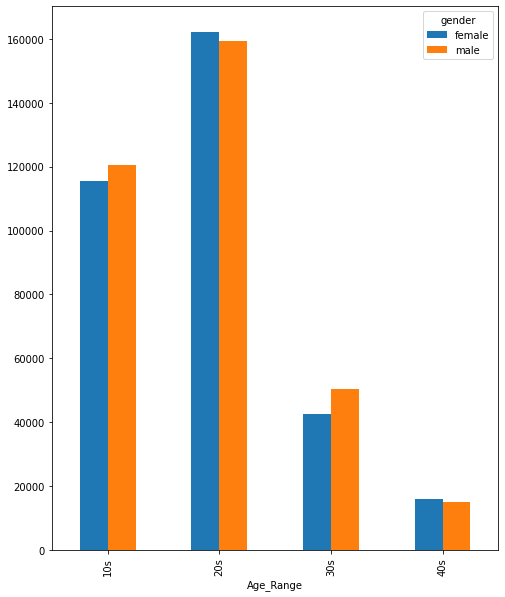

In [19]:
pd.crosstab(blog_df['Age_Range'],blog_df['gender']).plot(kind ='bar',figsize=(8,10))

# **Observations:**
     
| Age_Range | female | male |
| --- | --- | --- | 
| 10's   | 115389 | 120478 |
| 20's   | 162075 | 159372|
| 30's   | 42682 | 50358|
| 40's   | 15945 | 14985| 


- From the above table we can interpret that 10's Age Range blog has more male than female.

- From the above table we can interpret that the 20's Age Range blog has more  female than male.

- 30's Age Range has more male blogger than female.

- 40's Age Range has more Female blogger than male.

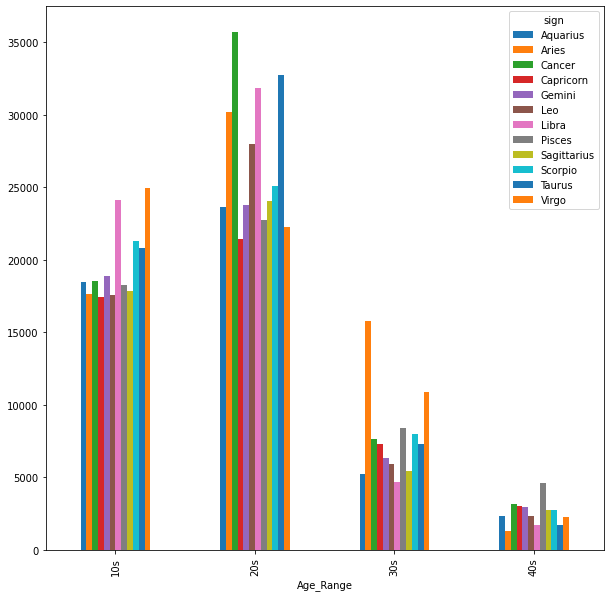

In [20]:
pd.crosstab(blog_df['Age_Range'],blog_df['sign']).plot(kind ='bar',figsize=(10,10))

# **Observations:**


|Age_Range |Aquarius 	|Aries 	|Cancer 	|Capricorn 	|Gemini |	Leo 	|Libra |	Pisces |	Sagittarius 	|Scorpio |	Taurus 	|Virgo 	|
|---|---|	---|	---|	---|	---|	---|	---|	---|	---|	---|	---|	---|												
|20s 	|23647 	|30213 	|35690 	|21442 	|23762 	|27962 	|31835 	|22785 	|24033 	|25066 	|32743 	|22269|
|30s 	|5258 	|15805 	|7672 	|7305 	|6357 	|5902 	|4660 	|8393 	|5433 	|8005 	|7328 	|10922|
|40s 	|2316 	|1309 	|3169 	|3017 	|2968 	|2347 	|1712 	|4627 	|2733 	|2768 	|1694 	|2270 |
|10s 	|18466 	|17652 	|18517 	|17437 	|18898 	|17600 	|24156 	|18248 	|17837 	|21322 	|20796 	|24938|


- From the above table Bloggers at Age 10 has mostly of Sign Virgo
- For the age of 20's Taurus are more in number.
- For the age of 30's Aries are more in number.
- For the age of 40's Pisces are more in number

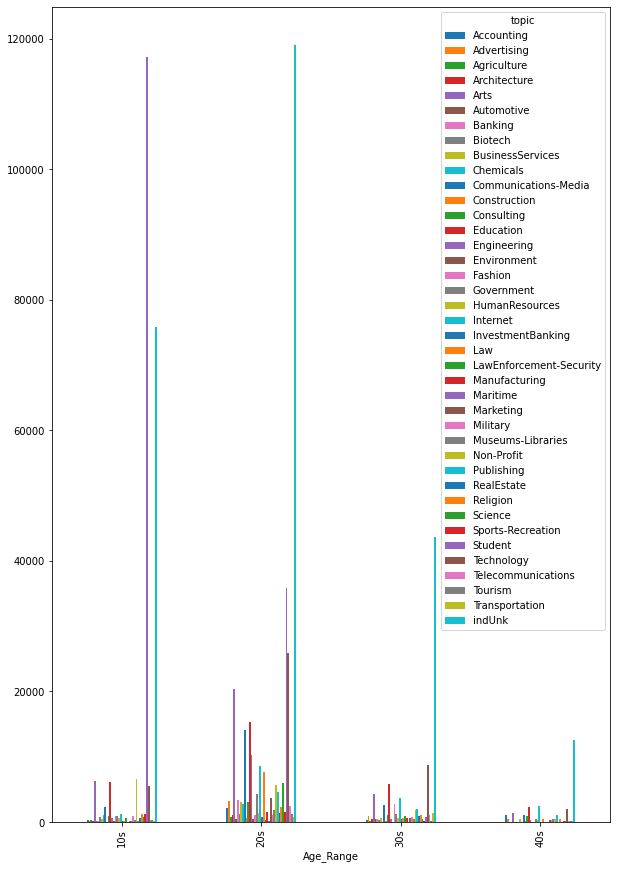

In [21]:
pd.crosstab(blog_df['Age_Range'],blog_df['topic']).plot(kind ='bar',figsize=(10,15))

In [22]:
pd.crosstab(blog_df['Age_Range'],blog_df['topic'])

topic,Accounting,Advertising,Agriculture,Architecture,Arts,Automotive,Banking,Biotech,BusinessServices,Chemicals,Communications-Media,Construction,Consulting,Education,Engineering,Environment,Fashion,Government,HumanResources,Internet,InvestmentBanking,Law,LawEnforcement-Security,Manufacturing,Maritime,Marketing,Military,Museums-Libraries,Non-Profit,Publishing,RealEstate,Religion,Science,Sports-Recreation,Student,Technology,Telecommunications,Tourism,Transportation,indUnk
Age_Range,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10s,312,109,359,139,6309,212,135,743,389,1040,2236,36,882,6165,613,96,860,887,646,1246,85,231,669,46,114,166,920,254,6657,192,605,1198,733,1280,117167,5545,240,344,146,75861
20s,2072,3145,701,1039,20431,488,3439,1190,3001,2832,14162,678,3067,15346,10237,458,1137,4347,1453,8566,731,7715,324,1487,147,3718,1150,1890,5702,4533,1369,2376,6025,1461,35856,25836,2414,1275,702,118947
30s,359,969,142,426,4291,513,423,253,661,8,2609,157,1031,5796,423,26,2808,1202,549,3752,462,591,885,678,0,650,809,424,1807,1977,852,1138,460,155,757,8662,1087,212,1321,43715
40s,1089,453,33,34,1418,31,52,48,449,48,1133,222,882,2326,380,12,46,471,362,2442,14,503,0,61,19,235,249,528,534,1051,44,523,51,142,123,2012,150,111,157,12492


# **Observations:**

-  For the bloggers in 10's have wrote the topic about students more than anyother topic.

- For the bloggers in 20's have choosen the Topic as indUnk.

- For the bloggers in 30's and 40's has choosen the Topic as indUnk

In [23]:
blog_df['text'][blog_df['topic']=="indUnk"].head(10)

74                      O= optimist P= pessimist  My argument with myself:  P: Nooooo! Stop thinking about him! O: Why? He's my boyfriend. I'm allowed to. P: You're obsessing! O: What?! No I'm not. I just like him a lot. P: You're crazy if you think it's going to work! O: Ok... Then I'm crazy! P: So you think it will work out between you two? Do you think he's 'the one'? O: Yes and possibly. P: Insane! I can't believe you! You know what is going to happen! The same thing that always happens. You w...
75                      Look at me. Look at my eyes. You see a tear. Now look into my eyes as I gaze aimlessly into yours. Grief, hope, anguish, love. I know you can see it all. We lock each other in a stare, trying to freeze us in this moment. A conversation passes between us, but no words are spoken. Unsure of what to do next, I run my fingers through your hair. Then we hug. This position once so odd now becomes the most comforting thing in my entire world. Then the bell rings. Yes... th

# **2. Perform data pre-processing on the data:**

# **• Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.**

In [24]:
# Removing the HTML Tags if any

from bs4 import BeautifulSoup

In [25]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [26]:
# Removing the HTML Tags
blog_df['text'] =blog_df['text'].apply(lambda x : strip_html_tags(x))

In [27]:
blog_df['text'].head(5)

0                                                                                                                                                                                                                                                                                                                                                                     Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         
1                                                                                                                                                                                                                                                                                                                                             These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail 

In [28]:
import unicodedata
def remove_accented_chars(text):
  return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [29]:
# Removing the Accented Characters.

blog_df['text'] = blog_df['text'].apply(lambda x: remove_accented_chars(x))

In [30]:
blog_df['text'].head(10)

0                                                                                                                                                                                                                                                                                                                                                                     Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         
1                                                                                                                                                                                                                                                                                                                                             These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail 

In [31]:
  # Removing unwanted Characters:
import re
blog_df['text'] = blog_df['text'].apply(lambda x : re.sub('[^a-zA-Z\s]','',x,re.I|re.A))

In [32]:
blog_df['text'].head(5)

0                                                                                                                                                                                                                                                                                                                                                                                   Info has been found   pages and  MB of pdf files Now i have to wait untill our team leader has processed it and learns html         
1                                                                                                                                                                                                                                                                                                                                                These are the team members   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering me          urlLink mail 

In [33]:
# Coverting into Lowercase:
blog_df['text'] = blog_df['text'].apply(lambda x : x.lower())

In [34]:
blog_df['text'].head(5)

0                                                                                                                                                                                                                                                                                                                                                                                   info has been found   pages and  mb of pdf files now i have to wait untill our team leader has processed it and learns html         
1                                                                                                                                                                                                                                                                                                                                                these are the team members   drewes van der laag           urllink mail  ruiyu xie                     urllink mail  bryan aaldering me          urllink mail 

In [35]:
import nltk

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
from nltk.stem import WordNetLemmatizer 

def lemmatize_text(text):
 
  # Init the Wordnet Lemmatizer
  lemmatizer = WordNetLemmatizer()
  # Tokenize: Split the sentence into words
  word_list = nltk.word_tokenize(text)
  # Lemmatize list of words and join
  lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
  return lemmatized_output

In [39]:
# Applying Lemmatization: 
blog_df['text'] = blog_df['text'].apply(lambda x : lemmatize_text(x))    

In [40]:
blog_df['text'].head(5)

0                                                                                                                                                                                                                                                                                                                                                                                                   info ha been found page and mb of pdf file now i have to wait untill our team leader ha processed it and learns html
1                                                                                                                                                                                                                                                                                                                                                                                                      these are the team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering me url

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# Removing stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
blog_df['keyword'] = blog_df['text'].apply(lambda words : " ".join(word for word in words.split() if word not in stop_words))

In [43]:
blog_df['keyword'].head(10)

0                                                                                                                                                                                                                                                                                                                                                                                                                                        info ha found page mb pdf file wait untill team leader ha processed learns html
1                                                                                                                                                                                                                                                                                                                                                                                                                       team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering url

In [44]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text,Age_Range,keyword
0,2059027,male,15,Student,Leo,"14,May,2004",info ha been found page and mb of pdf file now i have to wait untill our team leader ha processed it and learns html,10s,info ha found page mb pdf file wait untill team leader ha processed learns html
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering me urllink mail,10s,team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering urllink mail
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je eigen waterstofbom how to build an hbomb from ascotttartarusuwaeduau andrew scott newsgroups rechumor subject how to build an hbomb humorous date feb gmt organization the university of western australia original file dated th november seemed to be a transcript of a seven day article poorly formatted and corrupted i have added the text between examine under a microscope and malleable like gold a it wa missing if anyone ha the full text please distri...,10s,het kader van kernfusie op aarde maak je eigen waterstofbom build hbomb ascotttartarusuwaeduau andrew scott newsgroups rechumor subject build hbomb humorous date feb gmt organization university western australia original file dated th november seemed transcript seven day article poorly formatted corrupted added text examine microscope malleable like gold wa missing anyone ha full text please distribute responsible accuracy information converted html dionisioinfinetcom little spellchecking mi...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,10s,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoo toolbar i can now capture the url of popupswhich mean now i can show you some cool link to korean pop kpop audio and video without the need to relate instruction like go to the site click on the popaudio button then choose so without further ado here is the link to hour kpop urllink audio and the urllink video streaming enjoy,30s,thanks yahoo toolbar capture url popupswhich mean show cool link korean pop kpop audio video without need relate instruction like go site click popaudio button choose without ado link hour kpop urllink audio urllink video streaming enjoy


In [45]:
blog_df['Age_Range'].value_counts()

20s    321447
10s    235867
30s     93040
40s     30930
Name: Age_Range, dtype: int64

# **Observations** #

- As there are more than 600K rows its tough to build the model as even the TPU session getting crash, We can Separate the blog Text based on the Age Range and we will do the prediction.

- We can see there are 321447 blogs by the bloggers in age group 20s

- 235867 blogs by bloggers are in the age group 10s

- 93040 blogs with the bloggers has the age group of 30s

- 30930 blogs with the bloggers has the age group of 40s

# **Design, train, tune and test the best text classifier.**

# **Used TF_IDF Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer
tfidvectorizer = TfidfVectorizer(min_df=0.,max_df=1.,use_idf=True)
review_vectorizer = tfidvectorizer.fit_transform(blog_df['keyword'])

In [ ]:
review_vectorizer.shape

(681284, 1206127)

In [ ]:
X = review_vectorizer
Y = blog_df['topic']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state =5)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Training Accuracy" , logisticRegression.score(X_train, Y_train))
print("Testing Accuracy" , logisticRegression.score(X_test, Y_test))

Training Accuracy 0.448158725765258
Testing Accuracy 0.4166479113050796


In [ ]:
model_Dt = DecisionTreeClassifier(criterion='entropy')
model_Dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print("Training Accuracy" , model_Dt.score(X_train, Y_train))
print("Testing Accuracy" , model_Dt.score(X_test, Y_test))

Training Accuracy 0.9386808080553913
Testing Accuracy 0.27009677766578927


In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
print("Training Accuracy" , clf.score(X_train, Y_train))
print("Testing Accuracy" , clf.score(X_test, Y_test))

Training Accuracy 0.39196641629866347
Testing Accuracy 0.3807795054455785


# **Observations:**

- On applying the Tf-IDF Vectorizer on the entire rows of ~681284 has extracted the features of 1206127.

-  On Applying Different Traditional Classifier below are the accuracy.
    - Logistic Regression:
       - Training Accuracy 0.448158725765258
       - Testing Accuracy 0.4166479113050796
    - DecisionTreeClassifier:
      - Training Accuracy 0.9386808080553913
      - Testing Accuracy 0.27009677766578927
    - MultiNominalNB Classifier:
      - Training Accuracy 0.39196641629866347
      - Testing Accuracy 0.3807795054455785

- Since the accuracy is too low on train and Test dataset We have separate the blogs based on the age group and proceed further below.

# ***Bag of Words and N_Gram Model***

In [295]:
#Using Bag of Words and N_Gram Model using Count Vectorizier for different age groups

cv = CountVectorizer(min_df=0.,max_df=1.,ngram_range=(1,2))
cvmatrix = cv.fit_transform(blog_df[blog_df['Age_Range'] == '40s']['keyword'])

In [296]:
cvmatrix.shape

(30930, 2434078)

In [297]:
X_cv = cvmatrix
Y_cv = blog_df[blog_df['Age_Range'] == '40s']['topic']

In [298]:
X_cv_train,X_cv_test,Y_cv_train,Y_cv_test = train_test_split(X_cv,Y_cv,test_size=0.30,random_state =5)

In [ ]:
X_cv_test.shape

In [299]:
clf_cv = MultinomialNB()
clf_cv.fit(X_cv_train,Y_cv_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [300]:
print("Training Accuracy" , clf_cv.score(X_cv_train, Y_cv_train))
print("Testing Accuracy" , clf_cv.score(X_cv_test, Y_cv_test))

Training Accuracy 0.5316151678906286
Testing Accuracy 0.4262312749218666


In [301]:
model_Dt = DecisionTreeClassifier(criterion='entropy')
model_Dt.fit(X_cv_train, Y_cv_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [304]:
print("Training Accuracy" , model_Dt.score(X_cv_train, Y_cv_train))
print("Testing Accuracy" , model_Dt.score(X_cv_test, Y_cv_test))

Training Accuracy 0.990670176897141
Testing Accuracy 0.3995042569242375


In [302]:
y_pred = model_Dt.predict(X_cv_test)

In [305]:
print(classification_report(y_pred, Y_cv_test))

                      precision    recall  f1-score   support

          Accounting       0.63      0.67      0.65       297
         Advertising       0.09      0.12      0.10        99
         Agriculture       0.00      0.00      0.00         5
        Architecture       0.33      0.60      0.43         5
                Arts       0.22      0.27      0.24       357
          Automotive       0.12      0.09      0.11        11
             Banking       0.00      0.00      0.00        10
             Biotech       0.00      0.00      0.00         8
    BusinessServices       0.69      0.84      0.76       108
           Chemicals       0.00      0.00      0.00         6
Communications-Media       0.16      0.21      0.18       254
        Construction       0.32      0.48      0.38        42
          Consulting       0.13      0.15      0.14       210
           Education       0.26      0.36      0.30       542
         Engineering       0.11      0.20      0.14        61
       

In [312]:
print("For the Age Group of 40s predicted Label - ",y_pred[0])
print("For the Age Group of 40s True Label - ",np.array(Y_cv_test)[0])

print("For the Age Group of 40s predicted Label- ",y_pred[100])
print("For the Age Group of 40s True Label - ",np.array(Y_cv_test)[100])

print("For the Age Group of 40s predicted Label - ",y_pred[200])
print("For the Age Group of 40s True Label - ",np.array(Y_cv_test)[200])

print("For the Age Group of 40s predicted Label- ",y_pred[5])
print("For the Age Group of 40s True Label - ",np.array(Y_cv_test)[5])

print("For the Age Group of 40s predicted Label- ",y_pred[7])
print("For the Age Group of 40s True Label - ",np.array(Y_cv_test)[7])

For the Age Group of 40s predicted Label -  indUnk
For the Age Group of 40s True Label -  indUnk
For the Age Group of 40s predicted Label-  BusinessServices
For the Age Group of 40s True Label -  BusinessServices
For the Age Group of 40s predicted Label -  Education
For the Age Group of 40s True Label -  Museums-Libraries
For the Age Group of 40s predicted Label-  Internet
For the Age Group of 40s True Label -  Internet
For the Age Group of 40s predicted Label-  Arts
For the Age Group of 40s True Label -  indUnk


# **Observations from BOW and N_Gram Model for Age Group of Bloggers for 40s**

 - We can see the training accuracy as 0.99 and testing accuracy as 0.39 which make the model to be underfit with DecisionTreeclassifier.

 - As the test accuracy is low we can see the predict and true labels have miss match for 2 entries from the above output 

 -  Out of all blogs, the blogs with topic **BusinessServices** has been predicted correctly with a recall of 84%.

 - Out of all blogs, the blogs with topic **BusinessServices** has a good precision ration as 69%.  

In [313]:
#Using Bag of Words and N_Gram Model using Count Vectorizier for age group of 30's

cv_2 = CountVectorizer(min_df=0.,max_df=1.,ngram_range=(1,2))
cvmatrix_2 = cv_2.fit_transform(blog_df[blog_df['Age_Range'] == '30s']['keyword'])

In [314]:
cvmatrix_2.shape

(93040, 4836487)

In [315]:
X_cv_2 = cvmatrix_2
Y_cv_2 = blog_df[blog_df['Age_Range'] == '30s']['topic']

In [316]:
X_cv2_train,X_cv2_test,Y_cv2_train,Y_cv2_test = train_test_split(X_cv_2,Y_cv_2,test_size=0.30,random_state =5)

In [317]:
from sklearn.naive_bayes import MultinomialNB

clf_cv_2 = MultinomialNB()
clf_cv_2.fit(X_cv2_train,Y_cv2_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [318]:
print("Training Accuracy" , clf_cv_2.score(X_cv2_train, Y_cv2_train))
print("Testing Accuracy" , clf_cv_2.score(X_cv2_test, Y_cv2_test))

Training Accuracy 0.5279603242844859
Testing Accuracy 0.48864287761536257


In [319]:
model_Dt2 = DecisionTreeClassifier(criterion='entropy')
model_Dt2.fit(X_cv2_train, Y_cv2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [320]:
print("Training Accuracy" , model_Dt2.score(X_cv2_train, Y_cv2_train))
print("Testing Accuracy" , model_Dt2.score(X_cv2_test, Y_cv2_test))

Training Accuracy 0.987133030340253
Testing Accuracy 0.3999355116079106


In [321]:
y_pred2 = model_Dt2.predict(X_cv2_test)

In [322]:
print(classification_report(y_pred2, Y_cv2_test))

                         precision    recall  f1-score   support

             Accounting       0.12      0.14      0.13        77
            Advertising       0.08      0.12      0.10       193
            Agriculture       0.00      0.00      0.00        20
           Architecture       0.12      0.23      0.16        64
                   Arts       0.10      0.13      0.11       999
             Automotive       0.11      0.16      0.13        98
                Banking       0.08      0.12      0.10        82
                Biotech       0.04      0.07      0.05        41
       BusinessServices       0.07      0.14      0.09        96
              Chemicals       0.00      0.00      0.00         1
   Communications-Media       0.11      0.17      0.13       508
           Construction       0.09      0.11      0.10        35
             Consulting       0.17      0.24      0.20       219
              Education       0.25      0.31      0.27      1426
            Engineering 

In [323]:
print("For the Age Group of 30s predicted - ",y_pred2[0])
print("For the Age Group of 30s True Label - ",np.array(Y_cv2_test)[0])

print("For the Age Group of 30s predicted - ",y_pred2[100])
print("For the Age Group of 30s True Label - ",np.array(Y_cv2_test)[100])

print("For the Age Group of 30s predicted - ",y_pred2[200])
print("For the Age Group of 30s True Label - ",np.array(Y_cv2_test)[200])

print("For the Age Group of 30s predicted - ",y_pred2[5])
print("For the Age Group of 30s True Label - ",np.array(Y_cv2_test)[5])

print("For the Age Group of 30s predicted - ",y_pred2[7])
print("For the Age Group of 30s True Label - ",np.array(Y_cv2_test)[7])

For the Age Group of 30s predicted -  Telecommunications
For the Age Group of 30s True Label -  indUnk
For the Age Group of 30s predicted -  Internet
For the Age Group of 30s True Label -  Arts
For the Age Group of 30s predicted -  Internet
For the Age Group of 30s True Label -  Education
For the Age Group of 30s predicted -  RealEstate
For the Age Group of 30s True Label -  Arts
For the Age Group of 30s predicted -  indUnk
For the Age Group of 30s True Label -  indUnk


# **Observations from BOW and N_Gram Model for Age Group of Bloggers for 30s**

 - We can see the training accuracy as 0.98 and testing accuracy as 0.38 which make the model to be underfit with DecisionTreeclassifier.

 - As the test accuracy is low , AMong the 5 sample prediction vs True Labels only one prediction is correct 

 -  Out of all blogs, the blogs with topic **indUnk** has been predicted correctly with a recall of 53%.

 - Out of all blogs, the blogs with topic **indUnk** has a good precision ration as 69%.  

In [46]:
#Using Bag of Words and N_Gram Model using Count Vectorizier for age group of 20's

cv_3 = CountVectorizer(min_df=0.,max_df=1.,ngram_range=(1,2))
cvmatrix_3 = cv_3.fit_transform(blog_df[blog_df['Age_Range'] == '20s']['keyword'])

In [47]:
cvmatrix_3.shape

(321447, 12118444)

In [48]:
X_cv_3 = cvmatrix_3
Y_cv_3 = blog_df[blog_df['Age_Range'] == '20s']['topic']

In [49]:
X_cv3_train,X_cv3_test,Y_cv3_train,Y_cv3_test = train_test_split(X_cv_3,Y_cv_3,test_size=0.30,random_state =5)

In [50]:
clf_cv_3 = MultinomialNB()
clf_cv_3.fit(X_cv3_train,Y_cv3_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
print("Training Accuracy" , clf_cv_3.score(X_cv3_train, Y_cv3_train))
print("Testing Accuracy" , clf_cv_3.score(X_cv3_test, Y_cv3_test))

Training Accuracy 0.4324747124597799
Testing Accuracy 0.3785866127443356


In [52]:
y_pred3 = clf_cv_3.predict(X_cv3_test)

In [53]:
print(classification_report(y_pred3, Y_cv3_test))

                         precision    recall  f1-score   support

             Accounting       0.00      0.00      0.00         0
            Advertising       0.02      0.42      0.04        50
            Agriculture       0.00      0.00      0.00         0
           Architecture       0.00      0.00      0.00         1
                   Arts       0.02      0.48      0.04       275
             Automotive       0.00      0.00      0.00         0
                Banking       0.00      1.00      0.00         1
                Biotech       0.00      0.20      0.01         5
       BusinessServices       0.00      0.33      0.00         3
              Chemicals       0.00      0.00      0.00        12
   Communications-Media       0.00      0.59      0.01        32
           Construction       0.00      0.00      0.00         0
             Consulting       0.00      0.00      0.00         2
              Education       0.02      0.58      0.03       125
            Engineering 

In [54]:
print("For the Age Group of 20s predicted - ",y_pred3[0])
print("For the Age Group of 20s True Label - ",np.array(Y_cv3_test)[0])

print("For the Age Group of 20s predicted - ",y_pred3[100])
print("For the Age Group of 20s True Label - ",np.array(Y_cv3_test)[100])

print("For the Age Group of 20s predicted - ",y_pred3[200])
print("For the Age Group of 20s True Label - ",np.array(Y_cv3_test)[200])

print("For the Age Group of 20s predicted - ",y_pred3[5])
print("For the Age Group of 20s True Label - ",np.array(Y_cv3_test)[5])

print("For the Age Group of 20s predicted - ",y_pred3[7])
print("For the Age Group of 20s True Label - ",np.array(Y_cv3_test)[7])

For the Age Group of 20s predicted -  indUnk
For the Age Group of 20s True Label -  Education
For the Age Group of 20s predicted -  indUnk
For the Age Group of 20s True Label -  Student
For the Age Group of 20s predicted -  indUnk
For the Age Group of 20s True Label -  Student
For the Age Group of 20s predicted -  indUnk
For the Age Group of 20s True Label -  indUnk
For the Age Group of 20s predicted -  indUnk
For the Age Group of 20s True Label -  Education


# **Observations from BOW and N_Gram Model for Age Group of Bloggers for 20s**

 - We can see the training accuracy as 0.43 and testing accuracy as 0.37 which make the model to be underfit with MultiNominalNB.

 - As the test accuracy is low , Among the 5 sample prediction vs True Labels only one prediction is correct 

 -  Out of all blogs, the blogs with topic **indUnk** has been predicted correctly with a recall of 0.38.

 - Out of all blogs, the blogs with topic **indUnk** has a good precision ration as 0.99.  

In [46]:
#Using Bag of Words and N_Gram Model using Count Vectorizier for age group of 10's

cv_4 = CountVectorizer(min_df=0.,max_df=1.,ngram_range=(1,2))
cvmatrix_4 = cv_4.fit_transform(blog_df[blog_df['Age_Range'] == '10s']['keyword'])

In [47]:
cvmatrix_4.shape

(235867, 8417717)

In [48]:
X_cv_4 = cvmatrix_4
Y_cv_4 = blog_df[blog_df['Age_Range'] == '10s']['topic']

In [49]:
X_cv4_train,X_cv4_test,Y_cv4_train,Y_cv4_test = train_test_split(X_cv_4,Y_cv_4,test_size=0.30,random_state =5)

In [50]:
clf_cv_4 = MultinomialNB()
clf_cv_4.fit(X_cv4_train,Y_cv4_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
print("Training Accuracy" , clf_cv_4.score(X_cv4_train, Y_cv4_train))
print("Testing Accuracy" , clf_cv_4.score(X_cv4_test, Y_cv4_test))

Training Accuracy 0.7550301018739477
Testing Accuracy 0.5273809019092438


In [52]:
y_pred4 = clf_cv_4.predict(X_cv4_test)

In [53]:
print(classification_report(y_pred4, Y_cv4_test))

                         precision    recall  f1-score   support

             Accounting       0.00      0.00      0.00         0
            Advertising       0.00      0.00      0.00         0
            Agriculture       0.00      0.00      0.00         0
           Architecture       0.00      0.00      0.00         0
                   Arts       0.01      0.34      0.02        58
             Automotive       0.00      0.00      0.00         0
                Banking       0.00      0.00      0.00         0
                Biotech       0.00      0.00      0.00         7
       BusinessServices       0.00      0.00      0.00         0
              Chemicals       0.00      0.00      0.00         0
   Communications-Media       0.02      0.94      0.04        17
           Construction       0.00      0.00      0.00         0
             Consulting       0.00      0.00      0.00         3
              Education       0.00      0.14      0.01        51
            Engineering 

In [54]:
print("For the Age Group of 10s predicted - ",y_pred4[0])
print("For the Age Group of 10s True Label - ",np.array(Y_cv4_test)[0])

print("For the Age Group of 10s predicted - ",y_pred4[100])
print("For the Age Group of 10s True Label - ",np.array(Y_cv4_test)[100])

print("For the Age Group of 10s predicted - ",y_pred4[200])
print("For the Age Group of 10s True Label - ",np.array(Y_cv4_test)[200])

print("For the Age Group of 10s predicted - ",y_pred4[5])
print("For the Age Group of 10s True Label - ",np.array(Y_cv4_test)[5])

print("For the Age Group of 10s predicted - ",y_pred4[7])
print("For the Age Group of 10s True Label - ",np.array(Y_cv4_test)[7])

For the Age Group of 10s predicted -  Student
For the Age Group of 10s True Label -  Student
For the Age Group of 10s predicted -  Student
For the Age Group of 10s True Label -  Student
For the Age Group of 10s predicted -  Student
For the Age Group of 10s True Label -  Student
For the Age Group of 10s predicted -  Student
For the Age Group of 10s True Label -  Student
For the Age Group of 10s predicted -  Student
For the Age Group of 10s True Label -  Religion


# **Observations from BOW and N_Gram Model for Age Group of Bloggers for 10s**

 - We can see the training accuracy as 0.75 and testing accuracy as 0.52 which make the model to be underfit with MultiNominalNB.

 - As the test accuracy is low , Among the 5 sample prediction vs True Labels four predictions are correct. Model looks to be good. 

 -  Out of all blogs, the blogs with topic **Student** has been predicted correctly with a recall of 0.53.

 - Out of all blogs, the blogs with topic **Student** has a good precision ration as 0.91.  

# **Multi-Label Classification**

   -- Merge labels for multi-label classification problem.

   -- Label columns to merge : ["gender", "age", "topic", "sign"].

   -- Reduce the blog_df --> blog_df[Keyword, labels]

In [220]:
blog_df["age"] = blog_df["age"].astype(str)
blog_df["labels"] = blog_df.apply(lambda col :
                            [col["gender"],col["age"],col["topic"],col["sign"]],axis =1)

In [221]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text,Age_Range,keyword,labels
0,2059027,male,15,Student,Leo,"14,May,2004",info ha been found page and mb of pdf file now i have to wait untill our team leader ha processed it and learns html,10s,info ha found page mb pdf file wait untill team leader ha processed learns html,"[male, 15, Student, Leo]"
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering me urllink mail,10s,team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering urllink mail,"[male, 15, Student, Leo]"
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je eigen waterstofbom how to build an hbomb from ascotttartarusuwaeduau andrew scott newsgroups rechumor subject how to build an hbomb humorous date feb gmt organization the university of western australia original file dated th november seemed to be a transcript of a seven day article poorly formatted and corrupted i have added the text between examine under a microscope and malleable like gold a it wa missing if anyone ha the full text please distri...,10s,het kader van kernfusie op aarde maak je eigen waterstofbom build hbomb ascotttartarusuwaeduau andrew scott newsgroups rechumor subject build hbomb humorous date feb gmt organization university western australia original file dated th november seemed transcript seven day article poorly formatted corrupted added text examine microscope malleable like gold wa missing anyone ha full text please distribute responsible accuracy information converted html dionisioinfinetcom little spellchecking mi...,"[male, 15, Student, Leo]"
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,10s,testing testing,"[male, 15, Student, Leo]"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoo toolbar i can now capture the url of popupswhich mean now i can show you some cool link to korean pop kpop audio and video without the need to relate instruction like go to the site click on the popaudio button then choose so without further ado here is the link to hour kpop urllink audio and the urllink video streaming enjoy,30s,thanks yahoo toolbar capture url popupswhich mean show cool link korean pop kpop audio video without need relate instruction like go site click popaudio button choose without ado link hour kpop urllink audio urllink video streaming enjoy,"[male, 33, InvestmentBanking, Aquarius]"


In [222]:
data_original = blog_df.copy(deep=True)

In [223]:
data_original.drop(columns=["gender","age","sign","topic","date","text"],axis =1, inplace = True)

In [224]:
gc.collect()

264

In [225]:
data_original.head(5)

,id,Age_Range,keyword,labels
0,2059027,10s,info ha found page mb pdf file wait untill team leader ha processed learns html,"[male, 15, Student, Leo]"
1,2059027,10s,team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering urllink mail,"[male, 15, Student, Leo]"
2,2059027,10s,het kader van kernfusie op aarde maak je eigen waterstofbom build hbomb ascotttartarusuwaeduau andrew scott newsgroups rechumor subject build hbomb humorous date feb gmt organization university western australia original file dated th november seemed transcript seven day article poorly formatted corrupted added text examine microscope malleable like gold wa missing anyone ha full text please distribute responsible accuracy information converted html dionisioinfinetcom little spellchecking mi...,"[male, 15, Student, Leo]"
3,2059027,10s,testing testing,"[male, 15, Student, Leo]"
4,3581210,30s,thanks yahoo toolbar capture url popupswhich mean show cool link korean pop kpop audio video without need relate instruction like go site click popaudio button choose without ado link hour kpop urllink audio urllink video streaming enjoy,"[male, 33, InvestmentBanking, Aquarius]"


In [226]:
## Creating multi-label classification for Age Range of 40's

X_multi_lables_40s = data_original[data_original['Age_Range'] == '40s']['keyword']
y_multi_lables_40s = data_original[data_original['Age_Range'] == '40s']['labels']

X_multi_lables_40s_train, X_multi_lables_40s_test, y_multi_lables_40s_train, y_multi_lables_40s_test =train_test_split(X_multi_lables_40s,y_multi_lables_40s, random_state=42,
                                                                                                       test_size = 0.1,shuffle = True)

In [227]:
print("shape of training set :", X_multi_lables_40s_train.shape)
print("shape of test set :", X_multi_lables_40s_test.shape)

shape of training set : (27837,)
shape of test set : (3093,)


In [238]:
np.unique(y_multi_lables_40s).shape

(703,)

 **Count Vectorizer on BoW**

In [228]:
ctv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 2), stop_words = 'english')

corpus = list(X_multi_lables_40s_train)+list(X_multi_lables_40s_test)

In [229]:
ctv.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [230]:
xtrain_ctv = ctv.transform(X_multi_lables_40s_train)

In [231]:
xtest_ctv = ctv.transform(X_multi_lables_40s_test)

In [232]:
print(len(ctv.vocabulary_))

2314921


# **Create a dictionary to get the count of every label**

In [233]:
label_counts=dict()

for labels in y_multi_lables_40s.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1
        
label_counts

{'40': 5016,
 '41': 3738,
 '42': 2908,
 '43': 4230,
 '44': 2044,
 '45': 4482,
 '46': 2733,
 '47': 2207,
 '48': 3572,
 'Accounting': 1089,
 'Advertising': 453,
 'Agriculture': 33,
 'Aquarius': 2316,
 'Architecture': 34,
 'Aries': 1309,
 'Arts': 1418,
 'Automotive': 31,
 'Banking': 52,
 'Biotech': 48,
 'BusinessServices': 449,
 'Cancer': 3169,
 'Capricorn': 3017,
 'Chemicals': 48,
 'Communications-Media': 1133,
 'Construction': 222,
 'Consulting': 882,
 'Education': 2326,
 'Engineering': 380,
 'Environment': 12,
 'Fashion': 46,
 'Gemini': 2968,
 'Government': 471,
 'HumanResources': 362,
 'Internet': 2442,
 'InvestmentBanking': 14,
 'Law': 503,
 'Leo': 2347,
 'Libra': 1712,
 'Manufacturing': 61,
 'Maritime': 19,
 'Marketing': 235,
 'Military': 249,
 'Museums-Libraries': 528,
 'Non-Profit': 534,
 'Pisces': 4627,
 'Publishing': 1051,
 'RealEstate': 44,
 'Religion': 523,
 'Sagittarius': 2733,
 'Science': 51,
 'Scorpio': 2768,
 'Sports-Recreation': 142,
 'Student': 123,
 'Taurus': 1694,
 'Te

In [234]:
# Transform between iterable of iterables and a multilabel format
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

y_multi_lables_40s_train = binarizer.fit_transform(y_multi_lables_40s_train)
y_multi_lables_40s_test = binarizer.transform(y_multi_lables_40s_test)

In [239]:
y_multi_lables_40s_train[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [240]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'),
                    n_jobs=-1)),])
LogReg_pipeline.fit(xtrain_ctv, y_multi_lables_40s_train)

Y_predicted_oneVsRest = LogReg_pipeline.predict(xtest_ctv)

In [241]:
def print_predicted(y_predicted, y_test = y_multi_lables_40s_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print('Predicted - ',binarizer.inverse_transform(y_predicted)[k])
        print('True Label - ',binarizer.inverse_transform(y_test)[k])
        print("=================x==================x================x==========")              

In [243]:
print_predicted(y_predicted=Y_predicted_oneVsRest,y_test=y_multi_lables_40s_test, n= 10)

[1451, 1163, 2538, 2062, 1920, 2834, 1790, 2832, 2749, 1822]
Predicted -  ('male',)
True Label -  ('42', 'Capricorn', 'indUnk', 'male')
=================x==================x================x==========
Predicted -  ('43', '44', '45', '47', 'Aquarius', 'Publishing', 'Sagittarius', 'male')
True Label -  ('43', 'Aquarius', 'indUnk', 'male')
=================x==================x================x==========
Predicted -  ('female',)
True Label -  ('47', 'Cancer', 'Law', 'female')
=================x==================x================x==========
Predicted -  ('female',)
True Label -  ('47', 'Libra', 'Religion', 'female')
=================x==================x================x==========
Predicted -  ('male',)
True Label -  ('42', 'Capricorn', 'indUnk', 'male')
=================x==================x================x==========
Predicted -  ('female',)
True Label -  ('40', 'Taurus', 'female', 'indUnk')
=================x==================x================x==========
Predicted -  ('male',)
True Label -

In [ ]:
print('Accuracy score for Test Set: ', accuracy_score(y_multi_lables_40s_test, Y_predicted_oneVsRest))

Accuracy score for Test Set:  0.043323634012285804


In [242]:
print('Accuracy score for Test Set: ', accuracy_score(y_multi_lables_40s_test, Y_predicted_oneVsRest))
print('F1 score: Micro', f1_score(y_multi_lables_40s_test, Y_predicted_oneVsRest, average='micro'))
print('Average precision score: Micro', average_precision_score(y_multi_lables_40s_test, Y_predicted_oneVsRest, average='micro'))
print('Average recall score: Micro', recall_score(y_multi_lables_40s_test, Y_predicted_oneVsRest, average='micro'))

Accuracy score for Test Set:  0.043323634012285804
F1 score: Micro 0.3678925719816114
Average precision score: Micro 0.22833820242358677
Average recall score: Micro 0.2457969608794051


In [244]:
print('Accuracy score: ', accuracy_score(y_multi_lables_40s_test, Y_predicted_oneVsRest))
print('F1 score: Macro', f1_score(y_multi_lables_40s_test, Y_predicted_oneVsRest, average='macro'))
print('Average recall score: MAcro', recall_score(y_multi_lables_40s_test, Y_predicted_oneVsRest, average='macro'))

Accuracy score:  0.043323634012285804
F1 score: Macro 0.06850943765037881
Average recall score: MAcro 0.050227068278207256


In [245]:
print('Accuracy score: ', accuracy_score(y_multi_lables_40s_test, Y_predicted_oneVsRest))
print('F1 score: weighted', f1_score(y_multi_lables_40s_test, Y_predicted_oneVsRest, average='weighted'))
print('Average precision score: weighted', average_precision_score(y_multi_lables_40s_test, Y_predicted_oneVsRest, average='weighted'))
print('Average recall score: weighted', recall_score(y_multi_lables_40s_test, Y_predicted_oneVsRest, average='weighted'))

Accuracy score:  0.043323634012285804
F1 score: weighted 0.28205335793187186
Average precision score: weighted 0.2994552864261939
Average recall score: weighted 0.2457969608794051


# **Observations for Multi Label Classification of Age-Group 40s**

- Test Accuracy for Multi Label classification is too low as 0.04
- Predicted and True labels are also so poor.Among the multiple labels the prediction has found only one label which looks to be the Gender.
- The Average Precision and Recall is low as 0.29 and 0.24



In [246]:
# Multi Label prediction for Age Group under 30's
X_multi_lables_30s = data_original[data_original['Age_Range'] == '30s']['keyword']
y_multi_lables_30s = data_original[data_original['Age_Range'] == '30s']['labels']

X_multi_lables_30s_train, X_multi_lables_30s_test, y_multi_lables_30s_train, y_multi_lables_30s_test =train_test_split(X_multi_lables_30s,y_multi_lables_30s, random_state=42,
                                                                                                       test_size = 0.3,shuffle = True)

In [247]:
print("shape of training set :", X_multi_lables_30s_train.shape)
print("shape of test set :", X_multi_lables_30s_test.shape)

shape of training set : (65128,)
shape of test set : (27912,)


In [248]:
ctv_30s = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 2), stop_words = 'english')

corpus_30s = list(X_multi_lables_30s_train)+list(X_multi_lables_30s_test)

In [249]:
ctv_30s.fit(corpus_30s)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [250]:
xtrain_ctv_30s = ctv_30s.transform(X_multi_lables_30s_train)

In [251]:
xtest_ctv_30s = ctv_30s.transform(X_multi_lables_30s_test)

In [252]:
print(len(ctv_30s.vocabulary_))

4661052


In [253]:
label_counts_30s=dict()

for labels in y_multi_lables_30s.values:
    for label in labels:
        if label in label_counts_30s:
            label_counts_30s[str(label)]+=1
        else:
            label_counts_30s[str(label)]=1
        
label_counts_30s

{'33': 17584,
 '34': 21347,
 '35': 17462,
 '36': 14229,
 '37': 9317,
 '38': 7545,
 '39': 5556,
 'Accounting': 359,
 'Advertising': 969,
 'Agriculture': 142,
 'Aquarius': 5258,
 'Architecture': 426,
 'Aries': 15805,
 'Arts': 4291,
 'Automotive': 513,
 'Banking': 423,
 'Biotech': 253,
 'BusinessServices': 661,
 'Cancer': 7672,
 'Capricorn': 7305,
 'Chemicals': 8,
 'Communications-Media': 2609,
 'Construction': 157,
 'Consulting': 1031,
 'Education': 5796,
 'Engineering': 423,
 'Environment': 26,
 'Fashion': 2808,
 'Gemini': 6357,
 'Government': 1202,
 'HumanResources': 549,
 'Internet': 3752,
 'InvestmentBanking': 462,
 'Law': 591,
 'LawEnforcement-Security': 885,
 'Leo': 5902,
 'Libra': 4660,
 'Manufacturing': 678,
 'Marketing': 650,
 'Military': 809,
 'Museums-Libraries': 424,
 'Non-Profit': 1807,
 'Pisces': 8393,
 'Publishing': 1977,
 'RealEstate': 852,
 'Religion': 1138,
 'Sagittarius': 5433,
 'Science': 460,
 'Scorpio': 8005,
 'Sports-Recreation': 155,
 'Student': 757,
 'Taurus': 73

In [254]:
# Transform between iterable of iterables and a multilabel format
binarizer_30s=MultiLabelBinarizer(classes=sorted(label_counts_30s.keys()))

y_multi_lables_30s_train = binarizer_30s.fit_transform(y_multi_lables_30s_train)
y_multi_lables_30s_test = binarizer_30s.transform(y_multi_lables_30s_test)

In [255]:
y_multi_lables_30s_train[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [256]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline_30s = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'),
                    n_jobs=-1)),])
LogReg_pipeline_30s.fit(xtrain_ctv_30s, y_multi_lables_30s_train)

Pipeline(memory=None,
         steps=[('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                                  l1_ratio=None,
                                                                  max_iter=100,
                                                                  multi_class='auto',
                                                                  n_jobs=None,
                                                                  penalty='l2',
                                                                  random_state=None,
                                                      

In [257]:
Y_predicted_oneVsRest_30s = LogReg_pipeline_30s.predict(xtest_ctv_30s)

In [258]:
def print_predicted_30s(y_predicted, y_test = y_multi_lables_30s_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print('Predicted - ',binarizer_30s.inverse_transform(y_predicted)[k])
        print('True Label - ',binarizer_30s.inverse_transform(y_test)[k])
        print("=================x==================x================x==========")              

In [259]:
print_predicted_30s(y_predicted=Y_predicted_oneVsRest_30s,y_test=y_multi_lables_30s_test, n= 10)

[1334, 2142, 26481, 10557, 18165, 6801, 26528, 6923, 43, 9558]
Predicted -  ('female', 'indUnk')
True Label -  ('34', 'Taurus', 'female', 'indUnk')
=================x==================x================x==========
Predicted -  ('35', 'female', 'indUnk')
True Label -  ('35', 'Scorpio', 'female', 'indUnk')
=================x==================x================x==========
Predicted -  ('male',)
True Label -  ('33', 'Libra', 'indUnk', 'male')
=================x==================x================x==========
Predicted -  ('female', 'indUnk', 'male')
True Label -  ('35', 'Aries', 'indUnk', 'male')
=================x==================x================x==========
Predicted -  ('male',)
True Label -  ('38', 'Aries', 'Education', 'female')
=================x==================x================x==========
Predicted -  ('Capricorn', 'Communications-Media', 'Technology', 'male')
True Label -  ('35', 'Aries', 'Technology', 'male')
=================x==================x================x==========
Predicte

In [ ]:
print('Accuracy score for Test Set for 30s age Group: ', accuracy_score(y_multi_lables_30s_test, Y_predicted_oneVsRest_30s))

Accuracy score for Test Set for 30s age Group:  0.03145600458584122


In [260]:
print('Accuracy score for Test Set for 30s age Group: ', accuracy_score(y_multi_lables_30s_test, Y_predicted_oneVsRest_30s))
print('F1 score: Micro', f1_score(y_multi_lables_30s_test, Y_predicted_oneVsRest_30s, average='micro'))
print('Average precision score: Micro', average_precision_score(y_multi_lables_30s_test, Y_predicted_oneVsRest_30s, average='micro'))
print('Average recall score: Micro', recall_score(y_multi_lables_30s_test, Y_predicted_oneVsRest_30s, average='micro'))

Accuracy score for Test Set for 30s age Group:  0.031384350816852966
F1 score: Micro 0.3870734995348131
Average precision score: Micro 0.22909069053049277
Average recall score: Micro 0.27388757523645746


In [261]:
print('Accuracy score Test Set for 30s age Group: ', accuracy_score(y_multi_lables_30s_test, Y_predicted_oneVsRest_30s))
print('F1 score: Macro', f1_score(y_multi_lables_30s_test, Y_predicted_oneVsRest_30s, average='macro'))
print('Average recall score: MAcro', recall_score(y_multi_lables_30s_test, Y_predicted_oneVsRest_30s, average='macro'))

Accuracy score Test Set for 30s age Group:  0.031384350816852966
F1 score: Macro 0.07616216640561876
Average recall score: MAcro 0.05691455849842651


In [262]:
print('Accuracy score Test Set for 30s age Group: ', accuracy_score(y_multi_lables_30s_test, Y_predicted_oneVsRest_30s))
print('F1 score: weighted', f1_score(y_multi_lables_30s_test, Y_predicted_oneVsRest_30s, average='weighted'))
print('Average precision score: weighted', average_precision_score(y_multi_lables_30s_test, Y_predicted_oneVsRest_30s, average='weighted'))
print('Average recall score: weighted', recall_score(y_multi_lables_30s_test, Y_predicted_oneVsRest_30s, average='weighted'))

Accuracy score Test Set for 30s age Group:  0.031384350816852966
F1 score: weighted 0.3022157576430949
Average precision score: weighted 0.3104506379055459
Average recall score: weighted 0.27388757523645746


# **Observation for Multi Label classification for the age -Group of 30s**

- Test Accuracy is too low as 0.03%
- Predicted vs True labels looks to be wrong and miss match each other as the accuracy is los.

- The average Precision is 0.229 and average Recall is about 0.27

In [263]:
# Multi Label prediction for Age Group under 20's,As we are getting the session crash reducin the blog size to 100000k for Age Group 20's
X_multi_lables_20s = data_original[data_original['Age_Range'] == '20s']['keyword'].iloc[:100000]
y_multi_lables_20s = data_original[data_original['Age_Range'] == '20s']['labels'].iloc[:100000]

X_multi_lables_20s_train, X_multi_lables_20s_test, y_multi_lables_20s_train, y_multi_lables_20s_test =train_test_split(X_multi_lables_20s,y_multi_lables_20s, random_state=42,
                                                                                                       test_size = 0.3,shuffle = True)

In [264]:
print("shape of training set :", X_multi_lables_20s_train.shape)
print("shape of test set :", X_multi_lables_20s_test.shape)

shape of training set : (70000,)
shape of test set : (30000,)


In [265]:
ctv_20s = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 2), stop_words = 'english')

corpus_20s = list(X_multi_lables_20s_train)+list(X_multi_lables_20s_test)

In [266]:
ctv_20s.fit(corpus_20s)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [267]:
xtrain_ctv_20s = ctv_20s.transform(X_multi_lables_20s_train)

In [268]:
xtest_ctv_20s = ctv_20s.transform(X_multi_lables_20s_test)

In [269]:
print(len(ctv_20s.vocabulary_))

4820325


In [270]:
label_counts_20s=dict()

for labels in y_multi_lables_20s.values:
    for label in labels:
        if label in label_counts_20s:
            label_counts_20s[str(label)]+=1
        else:
            label_counts_20s[str(label)]=1
        
label_counts_20s

{'23': 19893,
 '24': 26734,
 '25': 18529,
 '26': 18218,
 '27': 16626,
 'Accounting': 591,
 'Advertising': 923,
 'Agriculture': 490,
 'Aquarius': 8556,
 'Architecture': 230,
 'Aries': 8726,
 'Arts': 5963,
 'Automotive': 51,
 'Banking': 747,
 'Biotech': 274,
 'BusinessServices': 1241,
 'Cancer': 11752,
 'Capricorn': 5192,
 'Chemicals': 371,
 'Communications-Media': 4281,
 'Construction': 294,
 'Consulting': 956,
 'Education': 5757,
 'Engineering': 4321,
 'Environment': 31,
 'Fashion': 187,
 'Gemini': 7706,
 'Government': 2096,
 'HumanResources': 414,
 'Internet': 2935,
 'InvestmentBanking': 345,
 'Law': 1097,
 'LawEnforcement-Security': 82,
 'Leo': 10804,
 'Libra': 9047,
 'Manufacturing': 643,
 'Maritime': 113,
 'Marketing': 1745,
 'Military': 316,
 'Museums-Libraries': 491,
 'Non-Profit': 2077,
 'Pisces': 7908,
 'Publishing': 1078,
 'RealEstate': 132,
 'Religion': 795,
 'Sagittarius': 6538,
 'Science': 2094,
 'Scorpio': 7296,
 'Sports-Recreation': 259,
 'Student': 11620,
 'Taurus': 1013

In [271]:
# Transform between iterable of iterables and a multilabel format
binarizer_20s=MultiLabelBinarizer(classes=sorted(label_counts_20s.keys()))

y_multi_lables_20s_train = binarizer_20s.fit_transform(y_multi_lables_20s_train)
y_multi_lables_20s_test = binarizer_20s.transform(y_multi_lables_20s_test)

In [272]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline_20s = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'),
                    n_jobs=-1)),])
LogReg_pipeline_20s.fit(xtrain_ctv_20s, y_multi_lables_20s_train)
Y_predicted_oneVsRest_20s = LogReg_pipeline_20s.predict(xtest_ctv_20s)

In [273]:
def print_predicted_20s(y_predicted, y_test = y_multi_lables_20s_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print('Predicted - ',binarizer_20s.inverse_transform(y_predicted)[k])
        print('True Label - ',binarizer_20s.inverse_transform(y_test)[k])
        print("=================x==================x================x==========")              

In [274]:
print_predicted_20s(y_predicted=Y_predicted_oneVsRest_20s,y_test=y_multi_lables_20s_test, n= 10)

[616, 18065, 16875, 7324, 4945, 11908, 38, 13970, 20802, 23570]
Predicted -  ('male',)
True Label -  ('27', 'Taurus', 'female', 'indUnk')
=================x==================x================x==========
Predicted -  ('female',)
True Label -  ('25', 'Sagittarius', 'Technology', 'female')
=================x==================x================x==========
Predicted -  ('male',)
True Label -  ('25', 'Pisces', 'Student', 'female')
=================x==================x================x==========
Predicted -  ('male',)
True Label -  ('25', 'Aquarius', 'Student', 'male')
=================x==================x================x==========
Predicted -  ('female',)
True Label -  ('24', 'Pisces', 'female', 'indUnk')
=================x==================x================x==========
Predicted -  ('male',)
True Label -  ('24', 'Gemini', 'Student', 'male')
=================x==================x================x==========
Predicted -  ('female',)
True Label -  ('25', 'Non-Profit', 'Pisces', 'male')
==========

In [ ]:
print('Accuracy score for Test Set for 20s age Group: ', accuracy_score(y_multi_lables_20s_test, Y_predicted_oneVsRest_20s))

Accuracy score for Test Set for 20s age Group:  0.0008666666666666666


In [275]:
print('Accuracy score: ', accuracy_score(y_multi_lables_20s_test, Y_predicted_oneVsRest_20s))
print('F1 score: Micro', f1_score(y_multi_lables_20s_test, Y_predicted_oneVsRest_20s, average='micro'))
print('Average precision score: Micro', average_precision_score(y_multi_lables_20s_test, Y_predicted_oneVsRest_20s, average='micro'))
print('Average recall score: Micro', recall_score(y_multi_lables_20s_test, Y_predicted_oneVsRest_20s, average='micro'))

Accuracy score:  0.0008666666666666666
F1 score: Micro 0.2492609593909641
Average precision score: Micro 0.15326130275180636
Average recall score: Micro 0.15634166666666666


In [276]:
print('Accuracy score: ', accuracy_score(y_multi_lables_20s_test, Y_predicted_oneVsRest_20s))
print('F1 score: Macro', f1_score(y_multi_lables_20s_test, Y_predicted_oneVsRest_20s, average='macro'))
print('Average recall score: MAcro', recall_score(y_multi_lables_20s_test, Y_predicted_oneVsRest_20s, average='macro'))

Accuracy score:  0.0008666666666666666
F1 score: Macro 0.022965961687033836
Average recall score: MAcro 0.021930337913046084


In [277]:
print('Accuracy score: ', accuracy_score(y_multi_lables_20s_test, Y_predicted_oneVsRest_20s))
print('F1 score: weighted', f1_score(y_multi_lables_20s_test, Y_predicted_oneVsRest_20s, average='weighted'))
print('Average precision score: weighted', average_precision_score(y_multi_lables_20s_test, Y_predicted_oneVsRest_20s, average='weighted'))
print('Average recall score: weighted', recall_score(y_multi_lables_20s_test, Y_predicted_oneVsRest_20s, average='weighted'))

Accuracy score:  0.0008666666666666666
F1 score: weighted 0.15870954960371017
Average precision score: weighted 0.2579240796170501
Average recall score: weighted 0.15634166666666666


# **Observation from the Multi Labels classification for Age-Group 20s** 

- Test accuracy is too low as 0.0008.
- From the predicted vs True label we can infer the predicted labels are poor.
- Average Precision and Recall for this model is also low as 0.153 and 0.156

In [278]:
# Multi Label prediction for Age Group under 10's,As we are getting the session crash reducin the blog size to 100000k for Age Group 20's
X_multi_lables_10s = data_original[data_original['Age_Range'] == '10s']['keyword'].iloc[:100000]
y_multi_lables_10s = data_original[data_original['Age_Range'] == '10s']['labels'].iloc[:100000]

X_multi_lables_10s_train, X_multi_lables_10s_test, y_multi_lables_10s_train, y_multi_lables_10s_test =train_test_split(X_multi_lables_10s,y_multi_lables_10s, random_state=42,
                                                                                                       test_size = 0.3,shuffle = True)

In [279]:
print("shape of training set :", X_multi_lables_10s_train.shape)
print("shape of test set :", X_multi_lables_10s_test.shape)

shape of training set : (70000,)
shape of test set : (30000,)


In [280]:
ctv_10s = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 2), stop_words = 'english')

corpus_10s = list(X_multi_lables_10s_train)+list(X_multi_lables_10s_test)

In [281]:
ctv_10s.fit(corpus_10s)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [282]:
xtrain_ctv_10s = ctv_10s.transform(X_multi_lables_10s_train)

In [283]:
xtest_ctv_10s = ctv_10s.transform(X_multi_lables_10s_test)

In [284]:
print(len(ctv_10s.vocabulary_))

4144334


In [285]:
label_counts_10s=dict()

for labels in y_multi_lables_10s.values:
    for label in labels:
        if label in label_counts_10s:
            label_counts_10s[str(label)]+=1
        else:
            label_counts_10s[str(label)]=1
        
label_counts_10s

{'13': 6729,
 '14': 11270,
 '15': 17330,
 '16': 28916,
 '17': 35755,
 'Accounting': 160,
 'Advertising': 65,
 'Agriculture': 217,
 'Aquarius': 7681,
 'Architecture': 31,
 'Aries': 6073,
 'Arts': 2096,
 'Automotive': 123,
 'Biotech': 529,
 'BusinessServices': 228,
 'Cancer': 7236,
 'Capricorn': 8726,
 'Chemicals': 233,
 'Communications-Media': 1759,
 'Construction': 29,
 'Consulting': 170,
 'Education': 2544,
 'Engineering': 246,
 'Environment': 92,
 'Fashion': 200,
 'Gemini': 9838,
 'Government': 131,
 'HumanResources': 87,
 'Internet': 763,
 'Law': 95,
 'LawEnforcement-Security': 274,
 'Leo': 6990,
 'Libra': 8854,
 'Maritime': 38,
 'Marketing': 94,
 'Military': 492,
 'Museums-Libraries': 202,
 'Non-Profit': 3168,
 'Pisces': 6919,
 'Publishing': 120,
 'RealEstate': 77,
 'Religion': 212,
 'Sagittarius': 7895,
 'Science': 568,
 'Scorpio': 7736,
 'Sports-Recreation': 640,
 'Student': 45038,
 'Taurus': 10140,
 'Technology': 4787,
 'Telecommunications': 19,
 'Tourism': 32,
 'Transportation'

In [286]:
# Transform between iterable of iterables and a multilabel format
binarizer_10s=MultiLabelBinarizer(classes=sorted(label_counts_10s.keys()))

y_multi_lables_10s_train = binarizer_10s.fit_transform(y_multi_lables_10s_train)
y_multi_lables_10s_test = binarizer_10s.transform(y_multi_lables_10s_test)

In [287]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline_10s = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'),
                    n_jobs=-1)),])
LogReg_pipeline_10s.fit(xtrain_ctv_10s, y_multi_lables_10s_train)
Y_predicted_oneVsRest_10s = LogReg_pipeline_10s.predict(xtest_ctv_10s)

In [288]:
def print_predicted_10s(y_predicted, y_test = y_multi_lables_10s_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print('Predicted - ',binarizer_10s.inverse_transform(y_predicted)[k])
        print('True Label - ',binarizer_10s.inverse_transform(y_test)[k])
        print("=================x==================x================x==========")              

In [289]:
print_predicted_10s(y_predicted=Y_predicted_oneVsRest_10s,y_test=y_multi_lables_10s_test, n= 10)

[5689, 29585, 10295, 26594, 15452, 13511, 22572, 17524, 16692, 27694]
Predicted -  ('male',)
True Label -  ('16', 'Taurus', 'indUnk', 'male')
=================x==================x================x==========
Predicted -  ('male',)
True Label -  ('17', 'Communications-Media', 'Sagittarius', 'female')
=================x==================x================x==========
Predicted -  ('male',)
True Label -  ('17', 'Cancer', 'indUnk', 'male')
=================x==================x================x==========
Predicted -  ('Student', 'male')
True Label -  ('16', 'Pisces', 'Student', 'male')
=================x==================x================x==========
Predicted -  ('female',)
True Label -  ('17', 'Aries', 'female', 'indUnk')
=================x==================x================x==========
Predicted -  ('Student', 'female')
True Label -  ('16', 'Scorpio', 'female', 'indUnk')
=================x==================x================x==========
Predicted -  ('Student', 'female')
True Label -  ('15', 'G

In [290]:
print('Accuracy score for Test Set for 10s age Group: ', accuracy_score(y_multi_lables_10s_test, Y_predicted_oneVsRest_10s))

Accuracy score for Test Set for 10s age Group:  0.0022333333333333333


In [291]:
print('Accuracy score: ', accuracy_score(y_multi_lables_10s_test, Y_predicted_oneVsRest_10s))
print('F1 score: Micro', f1_score(y_multi_lables_10s_test, Y_predicted_oneVsRest_10s, average='micro'))
print('Average precision score: Micro', average_precision_score(y_multi_lables_10s_test, Y_predicted_oneVsRest_10s, average='micro'))
print('Average recall score: Micro', recall_score(y_multi_lables_10s_test, Y_predicted_oneVsRest_10s, average='micro'))

Accuracy score:  0.0022333333333333333
F1 score: Micro 0.3224413065565093
Average precision score: Micro 0.18754458483715766
Average recall score: Micro 0.22083333333333333


In [292]:
print('Accuracy score: ', accuracy_score(y_multi_lables_10s_test, Y_predicted_oneVsRest_10s))
print('F1 score: Macro', f1_score(y_multi_lables_10s_test, Y_predicted_oneVsRest_10s, average='macro'))
print('Average recall score: MAcro', recall_score(y_multi_lables_10s_test, Y_predicted_oneVsRest_10s, average='macro'))

Accuracy score:  0.0022333333333333333
F1 score: Macro 0.035107887519096936
Average recall score: MAcro 0.0332783650855112


In [293]:
print('Accuracy score: ', accuracy_score(y_multi_lables_10s_test, Y_predicted_oneVsRest_10s))
print('F1 score: weighted', f1_score(y_multi_lables_10s_test, Y_predicted_oneVsRest_10s, average='weighted'))
print('Average precision score: weighted', average_precision_score(y_multi_lables_10s_test, Y_predicted_oneVsRest_10s, average='weighted'))
print('Average recall score: weighted', recall_score(y_multi_lables_10s_test, Y_predicted_oneVsRest_10s, average='weighted'))

Accuracy score:  0.0022333333333333333
F1 score: weighted 0.2263828957064162
Average precision score: weighted 0.32026550659995623
Average recall score: weighted 0.22083333333333333


# **Observation from the Multi Labels classification for Age-Group 10s** 

- Test accuracy is too low as 0.0023.
- From the predicted vs True label we can infer the predicted labels are poor.
- Average Precision and Recall for this model is also low as 0.18 and 0.22

# **Building a Deep Learning Model** 

We will use TF-IDF Vectorizier features in this case

In [131]:
#Start building a Keras Sequential Model
tf.keras.backend.clear_session()

In [132]:
# As the session is getting Crash separating the blog with age range. Age Range 40s text blog considering only the first 10000 blogs
from sklearn.feature_extraction.text import  TfidfVectorizer
tfidvectorizer = TfidfVectorizer(min_df=0.,max_df=1.,use_idf=True)
cvect_40s = tfidvectorizer.fit_transform(blog_df[blog_df['Age_Range'] == '40s']['keyword'].iloc[:10000])

In [133]:
X = cvect_40s
Y = blog_df[blog_df['Age_Range'] == '40s']['topic'].iloc[:10000]

In [134]:
np.unique(Y)

array(['Accounting', 'Advertising', 'Agriculture', 'Arts', 'Automotive',
       'Banking', 'Biotech', 'BusinessServices', 'Communications-Media',
       'Construction', 'Consulting', 'Education', 'Engineering',
       'Fashion', 'Government', 'HumanResources', 'Internet',
       'InvestmentBanking', 'Law', 'Manufacturing', 'Maritime',
       'Marketing', 'Military', 'Museums-Libraries', 'Non-Profit',
       'Publishing', 'Religion', 'Science', 'Student', 'Technology',
       'Tourism', 'Transportation', 'indUnk'], dtype=object)

In [135]:
np.unique(Y).shape

(33,)

In [136]:
X_train_NN_40s,X_test_NN_40s,Y_train_NN_40s,Y_test_NN_40s = train_test_split(X,Y,test_size = 0.30,random_state =5)

In [137]:
#Size of Document Term Matrix
X_train_NN_40s.shape

(7000, 57021)

In [138]:
Y_train_NN_40s.shape

(7000,)

In [139]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train_NN_40s = label_encoder.fit_transform(Y_train_NN_40s)
Y_test_NN_40s = label_encoder.fit_transform(Y_test_NN_40s)

In [140]:
Y_train_NN_40s = to_categorical(Y_train_NN_40s, num_classes=33)
Y_test_NN_40s = to_categorical(Y_test_NN_40s, num_classes=33)

In [141]:
model_40s = tf.keras.models.Sequential()
model_40s.add(tf.keras.layers.Reshape((57021,),input_shape=(57021,)))
#model.add(tf.keras.layers.BatchNormalization())
model_40s.add(tf.keras.layers.Dense(100, activation='relu'))
model_40s.add(tf.keras.layers.Dropout(0.4))
model_40s.add(tf.keras.layers.Dense(10, activation='relu'))
model_40s.add(tf.keras.layers.Dropout(0.4))
model_40s.add(tf.keras.layers.Dense(33, activation='sigmoid'))

In [142]:
model_40s.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 57021)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               5702200   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 33)                363       
Total params: 5,703,573
Trainable params: 5,703,573
Non-trainable params: 0
______________________________________________

In [143]:
# Compile the model
adam_op = tf.keras.optimizers.Adam(lr=0.01)
model_40s.compile(optimizer=adam_op, loss='categorical_crossentropy', metrics=['acc'])

In [144]:
check_point_1 = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback_1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights=True,mode = 'min')
model_40s.fit( x=X_train_NN_40s.toarray(), y=Y_train_NN_40s, batch_size=32, epochs=30, validation_split=0.3,callbacks=[callback_1,check_point_1])

Epoch 1/30
154/154 [==============================] - 2s 8ms/step - loss: 2.5346 - acc: 0.3186 - val_loss: 2.1715 - val_acc: 0.3595
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 2/30
154/154 [==============================] - 1s 6ms/step - loss: 2.0271 - acc: 0.3873 - val_loss: 1.9928 - val_acc: 0.4124
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 3/30
154/154 [==============================] - 1s 6ms/step - loss: 1.7559 - acc: 0.4529 - val_loss: 1.8927 - val_acc: 0.4995
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 4/30
154/154 [==============================] - 1s 7ms/step - loss: 1.5614 - acc: 0.5167 - val_loss: 1.8310 - val_acc: 0.5086
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 5/30
154/154 [==============================] - 1s 6ms/step - loss: 1.3751 - acc: 0.5835 - val_loss: 1.8663 - val_acc: 0.5348
Epoch 6/30
154/154 [==============================] - 1s 7ms/step - loss: 1.2655 - acc: 0.6157 - val_loss: 1.8688 - val_

In [145]:
##Loaded Back, Compiled and evaluated with the TestData Set
model_40s.evaluate(X_test_NN_40s.toarray(),Y_test_NN_40s)

94/94 [==============================] - 0s 4ms/step - loss: 6.0635 - acc: 0.0397


[6.0634965896606445, 0.03966666758060455]

In [146]:
y_pred_NN_40s = model_40s.predict(X_test_NN_40s.toarray())

In [147]:
print("For the Age Group of 40s predicted - ",y_pred_NN_40s[0].argmax()+1)
print("For the Age Group of 40s True Label - ",Y_test_NN_40s[0].argmax()+1)

print("For the Age Group of 40s predicted - ",y_pred_NN_40s[100].argmax()+1)
print("For the Age Group of 40s True Label - ",Y_test_NN_40s[100].argmax()+1)

print("For the Age Group of 40s predicted - ",y_pred_NN_40s[200].argmax()+1)
print("For the Age Group of 40s True Label - ",Y_test_NN_40s[200].argmax()+1)

print("For the Age Group of 40s predicted - ",y_pred_NN_40s[5].argmax()+1)
print("For the Age Group of 40s True Label - ",Y_test_NN_40s[5].argmax()+1)

print("For the Age Group of 40s predicted - ",y_pred_NN_40s[7].argmax()+1)
print("For the Age Group of 40s True Label - ",Y_test_NN_40s[7].argmax()+1)

For the Age Group of 40s predicted -  11
For the Age Group of 40s True Label -  16
For the Age Group of 40s predicted -  9
For the Age Group of 40s True Label -  8
For the Age Group of 40s predicted -  26
For the Age Group of 40s True Label -  30
For the Age Group of 40s predicted -  12
For the Age Group of 40s True Label -  11
For the Age Group of 40s predicted -  12
For the Age Group of 40s True Label -  11


In [219]:
print(classification_report(np.argmax(y_pred_NN_40s,axis=1) , np.argmax(Y_test_NN_40s,axis=1),
        target_names =['Accounting', 'Advertising', 'Agriculture', 'Arts', 'Automotive',
       'Banking', 'Biotech', 'BusinessServices', 'Communications-Media',
       'Construction', 'Consulting', 'Education', 'Engineering',
       'Fashion', 'Government', 'HumanResources', 'Internet',
       'InvestmentBanking', 'Law', 'Manufacturing', 'Maritime',
       'Marketing', 'Military', 'Museums-Libraries', 'Non-Profit',
       'Publishing', 'Religion', 'Science', 'Student', 'Technology','indUnk']))

                      precision    recall  f1-score   support

          Accounting       0.00      0.00      0.00         0
         Advertising       0.00      0.00      0.00         0
         Agriculture       0.00      0.00      0.00         0
                Arts       0.47      0.33      0.39       305
          Automotive       0.00      0.00      0.00         0
             Banking       0.00      0.00      0.00         0
             Biotech       0.00      0.00      0.00         0
    BusinessServices       0.00      0.00      0.00         0
Communications-Media       0.00      0.00      0.00        40
        Construction       0.00      0.00      0.00         0
          Consulting       0.02      0.04      0.03       313
           Education       0.12      0.01      0.01       782
         Engineering       0.00      0.00      0.00         0
             Fashion       0.00      0.00      0.00         0
          Government       0.00      0.00      0.00         0
      H

# **Observation from the NN model for Age-Group 40s** 

- Test accuracy is too low as 0.03 and training and Validation accuracy are more, looks to be under fit model.
- From the predicted vs True label we can infer the below.
  - For the Age Group of 40s predicted -  11  -- the corresponding label is Consulting.

  - For the Age Group of 40s True Label -  16  -- respective label is HumanResources.

  - For the Age Group of 40s predicted -  9  -- respective label is Communications-Media.

  - For the Age Group of 40s True Label -  8 -- respective label is BusinessServices.

  - For the Age Group of 40s predicted -  26  -- respective label is Publishing.

  - For the Age Group of 40s True Label -  30 -- respective label is Technology.

  - For the Age Group of 40s predicted -  12 -- the respective label is Education.

  - For the Age Group of 40s True Label -  11   -- the corresponding label is Consulting.

  - For the Age Group of 40s predicted -  12 -- the respective label is Education.

  - For the Age Group of 40s True Label -  11    -- the Corresponding lable is Consulting.

- From the classification Report the label Arts has percision as 0.47 and recall as 0.33      

In [111]:
# As the session is getting Crash separating the blog with age range. Age Range 30s text blog considering only the first 10000 blogs
tfidvectorizer_30s = TfidfVectorizer(min_df=0.,max_df=1.,use_idf=True)
cvect_30s = tfidvectorizer_30s.fit_transform(blog_df[blog_df['Age_Range'] == '30s']['keyword'].iloc[:10000])

In [112]:
X_30s = cvect_30s
Y_30s = blog_df[blog_df['Age_Range'] == '30s']['topic'].iloc[:10000]

In [113]:
np.unique(Y_30s)

array(['Advertising', 'Agriculture', 'Architecture', 'Arts', 'Automotive',
       'Banking', 'BusinessServices', 'Communications-Media',
       'Consulting', 'Education', 'Engineering', 'Environment', 'Fashion',
       'Government', 'Internet', 'InvestmentBanking', 'Law',
       'LawEnforcement-Security', 'Manufacturing', 'Marketing',
       'Non-Profit', 'Publishing', 'RealEstate', 'Religion', 'Science',
       'Sports-Recreation', 'Student', 'Technology', 'Telecommunications',
       'Tourism', 'Transportation', 'indUnk'], dtype=object)

In [114]:
np.unique(Y_30s).shape

(32,)

In [115]:
X_train_NN_30s,X_test_NN_30s,Y_train_NN_30s,Y_test_NN_30s = train_test_split(X_30s,Y_30s,test_size = 0.30,random_state =5)

In [116]:
#Size of Document Term Matrix
X_train_NN_30s.shape

(7000, 56471)

In [117]:
Y_train_NN_30s.shape

(7000,)

In [118]:
label_encoder = LabelEncoder()
Y_train_NN_30s = label_encoder.fit_transform(Y_train_NN_30s)
Y_test_NN_30s = label_encoder.fit_transform(Y_test_NN_30s)

In [119]:
Y_train_NN_30s = to_categorical(Y_train_NN_30s, num_classes=32)
Y_test_NN_30s = to_categorical(Y_test_NN_30s, num_classes=32)

In [120]:
model_30s = tf.keras.models.Sequential()
model_30s.add(tf.keras.layers.Reshape((56471,),input_shape=(56471,)))
#model.add(tf.keras.layers.BatchNormalization())
model_30s.add(tf.keras.layers.Dense(100, activation='relu'))
model_30s.add(tf.keras.layers.Dropout(0.4))
model_30s.add(tf.keras.layers.Dense(10, activation='relu'))
model_30s.add(tf.keras.layers.Dropout(0.4))
model_30s.add(tf.keras.layers.Dense(32, activation='sigmoid'))

In [121]:
# Compile the model
adam_op = tf.keras.optimizers.Adam(lr=0.01)
model_30s.compile(optimizer=adam_op, loss='categorical_crossentropy', metrics=['acc'])

In [122]:
check_point_2 = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback_2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights=True,mode = 'min')
model_30s.fit( x=X_train_NN_30s.toarray(), y=Y_train_NN_30s, batch_size=32, epochs=30, validation_split=0.3,callbacks=[callback_2,check_point_2])

Epoch 1/30
154/154 [==============================] - 2s 8ms/step - loss: 2.0983 - acc: 0.3833 - val_loss: 1.4422 - val_acc: 0.6343
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 2/30
154/154 [==============================] - 1s 7ms/step - loss: 1.3725 - acc: 0.5863 - val_loss: 1.3349 - val_acc: 0.6381
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 3/30
154/154 [==============================] - 1s 6ms/step - loss: 1.1089 - acc: 0.6586 - val_loss: 1.3289 - val_acc: 0.6481
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 4/30
154/154 [==============================] - 1s 7ms/step - loss: 0.9289 - acc: 0.7180 - val_loss: 1.3896 - val_acc: 0.6395
Epoch 5/30
154/154 [==============================] - 1s 7ms/step - loss: 0.8477 - acc: 0.7392 - val_loss: 1.4508 - val_acc: 0.6214
Epoch 6/30
154/154 [==============================] - 1s 6ms/step - loss: 0.7737 - acc: 0.7620 - val_loss: 1.4603 - val_acc: 0.6343
Epoch 7/30
154/154 [=======================

In [123]:
##Loaded Back, Compiled and evaluated with the TestData Set
model_30s.evaluate(X_test_NN_30s.toarray(),Y_test_NN_30s)

94/94 [==============================] - 0s 4ms/step - loss: 7.6728 - acc: 0.1073


[7.672751426696777, 0.10733333230018616]

In [124]:
y_pred_NN_30s = model_30s.predict(X_test_NN_30s.toarray())

In [125]:
print("For the Age Group of 30s predicted - ",y_pred_NN_30s[0].argmax()+1)
print("For the Age Group of 30s True Label - ",Y_test_NN_30s[0].argmax()+1)

print("For the Age Group of 30s predicted - ",y_pred_NN_30s[100].argmax()+1)
print("For the Age Group of 30s True Label - ",Y_test_NN_30s[100].argmax()+1)

print("For the Age Group of 30s predicted - ",y_pred_NN_30s[200].argmax()+1)
print("For the Age Group of 30s True Label - ",Y_test_NN_30s[200].argmax()+1)

print("For the Age Group of 30s predicted - ",y_pred_NN_30s[5].argmax()+1)
print("For the Age Group of 30s True Label - ",Y_test_NN_30s[5].argmax()+1)

print("For the Age Group of 30s predicted - ",y_pred_NN_30s[7].argmax()+1)
print("For the Age Group of 30s True Label - ",Y_test_NN_30s[7].argmax()+1)

For the Age Group of 30s predicted -  32
For the Age Group of 30s True Label -  14
For the Age Group of 30s predicted -  28
For the Age Group of 30s True Label -  25
For the Age Group of 30s predicted -  28
For the Age Group of 30s True Label -  25
For the Age Group of 30s predicted -  28
For the Age Group of 30s True Label -  4
For the Age Group of 40s predicted -  32
For the Age Group of 40s True Label -  4


In [217]:
print(classification_report(np.argmax(y_pred_NN_30s, axis=1), np.argmax(Y_test_NN_30s,axis=1),
                            target_names=['Advertising', 'Agriculture', 'Architecture', 'Arts', 'Automotive',
       'Banking', 'BusinessServices', 'Communications-Media',
       'Consulting', 'Education', 'Engineering', 'Environment', 'Fashion',
       'Government', 'Internet', 'InvestmentBanking', 'Law',
       'LawEnforcement-Security', 'Manufacturing', 'Marketing',
       'Non-Profit', 'Publishing', 'RealEstate', 'Religion', 'Science',
       'Sports-Recreation', 'Student', 'Technology', 'Telecommunications','indUnk']))

                         precision    recall  f1-score   support

            Advertising       0.00      0.00      0.00         0
            Agriculture       0.00      0.00      0.00         0
           Architecture       0.00      0.00      0.00         0
                   Arts       0.00      0.00      0.00         0
             Automotive       0.00      0.00      0.00         0
                Banking       0.00      0.00      0.00         0
       BusinessServices       0.00      0.00      0.00         0
   Communications-Media       0.00      0.00      0.00         0
             Consulting       0.00      0.00      0.00         0
              Education       0.80      0.85      0.82       351
            Engineering       0.00      0.00      0.00         0
            Environment       0.00      0.00      0.00         0
                Fashion       0.15      0.00      0.01       481
             Government       0.00      0.00      0.00         0
               Internet 

# **Observation from the NN model for Age-Group 30s** 

- Test accuracy is too low as 0.107 and training and Validation accuracy are more, looks to be under fit model.
- From the predicted vs True label we can infer the below.
  - For the Age Group of 30s predicted -  32  -- the corresponding label is indUnk.

  - For the Age Group of 30s True Label -  14  -- respective label is Government.

  - For the Age Group of 30s predicted -  28  -- respective label is Technology.

  - For the Age Group of 30s True Label -  25 -- respective label is Science.

  - For the Age Group of 30s predicted -  28  -- respective label is Technology.

  - For the Age Group of 30s True Label -  25 -- respective label is Science.

  - For the Age Group of 30s predicted -  28 -- the respective label is Technology.

  - For the Age Group of 30s True Label -  4   -- the corresponding label is Arts.

  - For the Age Group of 30s predicted -  32 -- the respective label is indUnk.

  - For the Age Group of 30s True Label -  4    -- the COrresponding lable is Arts.

- From the classification Report the label Education has percision as 0.80 and recall as 0.85      

In [90]:
# As the session is getting Crash separating the blog with age range. Age Range 20s text blog considering only the first 10000 blogs
tfidvectorizer_20s = TfidfVectorizer(min_df=0.,max_df=1.,use_idf=True)
cvect_20s = tfidvectorizer_20s.fit_transform(blog_df[blog_df['Age_Range'] == '20s']['keyword'].iloc[:10000])

In [91]:
X_20s = cvect_20s
Y_20s = blog_df[blog_df['Age_Range'] == '20s']['topic'].iloc[:10000]

In [92]:
np.unique(Y_20s)

array(['Accounting', 'Advertising', 'Architecture', 'Arts', 'Automotive',
       'Banking', 'BusinessServices', 'Chemicals', 'Communications-Media',
       'Construction', 'Consulting', 'Education', 'Engineering',
       'Government', 'HumanResources', 'Internet', 'InvestmentBanking',
       'Law', 'Marketing', 'Military', 'Museums-Libraries', 'Non-Profit',
       'Publishing', 'RealEstate', 'Religion', 'Science',
       'Sports-Recreation', 'Student', 'Technology', 'Telecommunications',
       'Transportation', 'indUnk'], dtype=object)

In [93]:
np.unique(Y_20s).shape

(32,)

In [94]:
X_train_NN_20s,X_test_NN_20s,Y_train_NN_20s,Y_test_NN_20s = train_test_split(X_20s,Y_20s,test_size = 0.30,random_state =5)

In [95]:
#Size of Document Term Matrix
X_train_NN_20s.shape

(7000, 66387)

In [96]:
label_encoder = LabelEncoder()
Y_train_NN_20s = label_encoder.fit_transform(Y_train_NN_20s)
Y_test_NN_20s = label_encoder.fit_transform(Y_test_NN_20s)

In [97]:
Y_train_NN_20s = to_categorical(Y_train_NN_20s, num_classes=32)
Y_test_NN_20s = to_categorical(Y_test_NN_20s, num_classes=32)

In [98]:
model_20s = tf.keras.models.Sequential()
model_20s.add(tf.keras.layers.Reshape((66387,),input_shape=(66387,)))
#model.add(tf.keras.layers.BatchNormalization())
model_20s.add(tf.keras.layers.Dense(100, activation='relu'))
model_20s.add(tf.keras.layers.Dropout(0.4))
model_20s.add(tf.keras.layers.Dense(10, activation='relu'))
model_20s.add(tf.keras.layers.Dropout(0.4))
model_20s.add(tf.keras.layers.Dense(32, activation='sigmoid'))

In [99]:
model_20s.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 66387)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               6638800   
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                352       
Total params: 6,640,162
Trainable params: 6,640,162
Non-trainable params: 0
____________________________________________

In [100]:
# Compile the model
adam_op = tf.keras.optimizers.Adam(lr=0.01)
model_20s.compile(optimizer=adam_op, loss='categorical_crossentropy', metrics=['acc'])

In [101]:
check_point_3 = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback_3 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights=True,mode = 'min')
model_20s.fit( x=X_train_NN_20s.toarray(), y=Y_train_NN_20s, batch_size=32, epochs=30, validation_split=0.3,callbacks=[callback_3,check_point_3])

Epoch 1/30
154/154 [==============================] - 2s 9ms/step - loss: 2.3286 - acc: 0.4680 - val_loss: 2.0038 - val_acc: 0.4705
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 2/30
154/154 [==============================] - 1s 7ms/step - loss: 1.8098 - acc: 0.4922 - val_loss: 1.9595 - val_acc: 0.4948
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 3/30
154/154 [==============================] - 1s 7ms/step - loss: 1.5509 - acc: 0.5467 - val_loss: 2.0299 - val_acc: 0.5019
Epoch 4/30
154/154 [==============================] - 1s 7ms/step - loss: 1.3995 - acc: 0.5727 - val_loss: 2.0589 - val_acc: 0.5086
Epoch 5/30
154/154 [==============================] - 1s 7ms/step - loss: 1.3002 - acc: 0.5986 - val_loss: 2.0916 - val_acc: 0.4619
Epoch 6/30
154/154 [==============================] - 1s 7ms/step - loss: 1.2224 - acc: 0.6220 - val_loss: 2.1085 - val_acc: 0.4871
Epoch 7/30
154/154 [==============================] - 1s 7ms/step - loss: 1.1553 - acc: 0.6396 - v

In [102]:
##Loaded Back, Compiled and evaluated with the TestData Set
model_20s.evaluate(X_test_NN_20s.toarray(),Y_test_NN_20s)

94/94 [==============================] - 0s 5ms/step - loss: 4.6998 - acc: 0.0043


[4.699831008911133, 0.004333333112299442]

In [103]:
y_pred_NN_20s = model_20s.predict(X_test_NN_20s.toarray())

In [104]:
print("For the Age Group of 20s predicted - ",y_pred_NN_20s[0].argmax()+1)
print("For the Age Group of 20s True Label - ",Y_test_NN_20s[0].argmax()+1)

print("For the Age Group of 20s predicted - ",y_pred_NN_20s[100].argmax()+1)
print("For the Age Group of 20s True Label - ",Y_test_NN_20s[100].argmax()+1)

print("For the Age Group of 20s predicted - ",y_pred_NN_20s[200].argmax()+1)
print("For the Age Group of 20s True Label - ",Y_test_NN_20s[200].argmax()+1)

print("For the Age Group of 20s predicted - ",y_pred_NN_20s[5].argmax()+1)
print("For the Age Group of 20s True Label - ",Y_test_NN_20s[5].argmax()+1)

print("For the Age Group of 20s predicted - ",y_pred_NN_20s[7].argmax()+1)
print("For the Age Group of 20s True Label - ",Y_test_NN_20s[7].argmax()+1)

For the Age Group of 20s predicted -  32
For the Age Group of 20s True Label -  25
For the Age Group of 20s predicted -  32
For the Age Group of 20s True Label -  29
For the Age Group of 20s predicted -  32
For the Age Group of 20s True Label -  24
For the Age Group of 20s predicted -  32
For the Age Group of 20s True Label -  29
For the Age Group of 20s predicted -  32
For the Age Group of 20s True Label -  15


In [212]:
print(classification_report(np.argmax(y_pred_NN_20s, axis=1) , np.argmax(Y_test_NN_20s,axis=1),target_names=['Accounting', 'Advertising', 'Architecture', 'Arts', 'Automotive',
       'Banking', 'BusinessServices', 'Chemicals', 'Communications-Media',
       'Construction', 'Consulting', 'Education', 'Engineering',
       'Government', 'HumanResources', 'Internet', 'InvestmentBanking',
       'Law', 'Marketing', 'Military', 'Museums-Libraries', 'Non-Profit',
       'Publishing', 'RealEstate', 'Religion', 'Science',
       'Sports-Recreation', 'Student', 'Technology',  'indUnk']))

                      precision    recall  f1-score   support

          Accounting       0.00      0.00      0.00         0
         Advertising       0.00      0.00      0.00         0
        Architecture       0.00      0.00      0.00         0
                Arts       0.00      0.00      0.00         0
          Automotive       0.00      0.00      0.00         0
             Banking       0.00      0.00      0.00         0
    BusinessServices       0.00      0.00      0.00         0
           Chemicals       0.00      0.00      0.00         0
Communications-Media       0.00      0.00      0.00         0
        Construction       0.00      0.00      0.00         0
          Consulting       0.00      0.00      0.00         0
           Education       0.00      0.00      0.00         0
         Engineering       0.00      0.00      0.00         9
          Government       0.00      0.00      0.00         0
      HumanResources       0.00      0.00      0.00         0
       

# **Observation from the NN model for Age-Group 20s** 

- Test accuracy is too low as 0.0043 and training and Validation accuracy are more, looks to be under fit model.
- From the predicted vs True label we can infer the below.
  - For the Age Group of 30s predicted -  32  -- the corresponding label is indUnk.

  - For the Age Group of 30s True Label -  25  -- respective label is Religion.

  - For the Age Group of 30s predicted -  32  -- respective label is indUnk.

  - For the Age Group of 30s True Label -  29 -- respective label is Technology.

  - For the Age Group of 30s predicted -  32  -- respective label is indUnk.

  - For the Age Group of 30s True Label -  24 -- respective label is RealEstate.

  - For the Age Group of 30s predicted -  32 -- the respective label is indUnk.

  - For the Age Group of 30s True Label -  29   -- the corresponding label is Technology.

  - For the Age Group of 30s predicted -  32 -- the respective label is indUnk.

  - For the Age Group of 30s True Label -  15    -- the Corresponding lable is HumanResources.

- From the classification Report the label Technology has percision as 0.01 and recall as 0.09      

In [49]:
# As the session is getting Crash separating the blog with age range. Age Range 10s text blog considering only the first 10000 blogs
tfidvectorizer_10s = TfidfVectorizer(min_df=0.,max_df=1.,use_idf=True)
cvect_10s = tfidvectorizer_10s.fit_transform(blog_df[blog_df['Age_Range'] == '10s']['keyword'].iloc[:10000])

In [50]:
X_10s = cvect_10s
Y_10s = blog_df[blog_df['Age_Range'] == '10s']['topic'].iloc[:10000]

In [51]:
np.unique(Y_10s)

array(['Accounting', 'Agriculture', 'Arts', 'Automotive', 'Biotech',
       'BusinessServices', 'Education', 'Fashion', 'Government',
       'HumanResources', 'Internet', 'Military', 'Non-Profit', 'Religion',
       'Science', 'Sports-Recreation', 'Student', 'Technology', 'indUnk'],
      dtype=object)

In [52]:
np.unique(Y_10s).shape

(19,)

In [53]:
X_train_NN_10s,X_test_NN_10s,Y_train_NN_10s,Y_test_NN_10s = train_test_split(X_10s,Y_10s,test_size = 0.30,random_state =5)

In [54]:
#Size of Document Term Matrix
X_train_NN_10s.shape

(7000, 70992)

In [55]:
label_encoder = LabelEncoder()
Y_train_NN_10s = label_encoder.fit_transform(Y_train_NN_10s)
Y_test_NN_10s = label_encoder.fit_transform(Y_test_NN_10s)

In [56]:
Y_train_NN_10s = to_categorical(Y_train_NN_10s, num_classes=19)
Y_test_NN_10s = to_categorical(Y_test_NN_10s, num_classes=19)

In [57]:
model_10s = tf.keras.models.Sequential()
model_10s.add(tf.keras.layers.Reshape((70992,),input_shape=(70992,)))
#model.add(tf.keras.layers.BatchNormalization())
model_10s.add(tf.keras.layers.Dense(100, activation='relu'))
model_10s.add(tf.keras.layers.Dropout(0.4))
model_10s.add(tf.keras.layers.Dense(10, activation='relu'))
model_10s.add(tf.keras.layers.Dropout(0.4))
model_10s.add(tf.keras.layers.Dense(19, activation='sigmoid'))

In [58]:
model_10s.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 70992)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               7099300   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 19)                209       
Total params: 7,100,519
Trainable params: 7,100,519
Non-trainable params: 0
______________________________________________

In [59]:
# Compile the model
adam_op = tf.keras.optimizers.Adam(lr=0.01)
model_10s.compile(optimizer=adam_op, loss='categorical_crossentropy', metrics=['acc'])

In [60]:
check_point_4 = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback_4= tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights=True,mode = 'min')
model_10s.fit( x=X_train_NN_10s.toarray(), y=Y_train_NN_10s, batch_size=32, epochs=30, validation_split=0.3,callbacks=[callback_4,check_point_4])

Epoch 1/30
154/154 [==============================] - 3s 10ms/step - loss: 1.4580 - acc: 0.4706 - val_loss: 1.1527 - val_acc: 0.5733
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 2/30
154/154 [==============================] - 1s 7ms/step - loss: 1.0142 - acc: 0.6416 - val_loss: 1.0438 - val_acc: 0.6329
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 3/30
154/154 [==============================] - 1s 8ms/step - loss: 0.7332 - acc: 0.7512 - val_loss: 1.0815 - val_acc: 0.6462
Epoch 4/30
154/154 [==============================] - 1s 8ms/step - loss: 0.6039 - acc: 0.7935 - val_loss: 1.1907 - val_acc: 0.6533
Epoch 5/30
154/154 [==============================] - 1s 7ms/step - loss: 0.5122 - acc: 0.8343 - val_loss: 1.2612 - val_acc: 0.6395
Epoch 6/30
154/154 [==============================] - 1s 7ms/step - loss: 0.4680 - acc: 0.8455 - val_loss: 1.4223 - val_acc: 0.6457
Epoch 7/30
154/154 [==============================] - 1s 7ms/step - loss: 0.4549 - acc: 0.8582 - 

In [61]:
y_pred_NN_10s = model_10s.predict(X_test_NN_10s.toarray())

In [62]:
##Loaded Back, Compiled and evaluated with the TestData Set
model_10s.evaluate(X_test_NN_10s.toarray(),Y_test_NN_10s)

94/94 [==============================] - 0s 5ms/step - loss: 8.0778 - acc: 0.0020


[8.077788352966309, 0.0020000000949949026]

In [63]:
print("For the Age Group of 10s predicted - ",y_pred_NN_10s[0].argmax()+1)
print("For the Age Group of 10s True Label - ",Y_test_NN_10s[0].argmax()+1)

print("For the Age Group of 10s predicted - ",y_pred_NN_10s[100].argmax()+1)
print("For the Age Group of 10s True Label - ",Y_test_NN_10s[100].argmax()+1)

print("For the Age Group of 10s predicted - ",y_pred_NN_10s[200].argmax()+1)
print("For the Age Group of 10s True Label - ",Y_test_NN_10s[200].argmax()+1)

print("For the Age Group of 10s predicted - ",y_pred_NN_10s[5].argmax()+1)
print("For the Age Group of 10s True Label - ",Y_test_NN_10s[5].argmax()+1)

print("For the Age Group of 10s predicted - ",y_pred_NN_10s[7].argmax()+1)
print("For the Age Group of 10s True Label - ",Y_test_NN_10s[7].argmax()+1)

For the Age Group of 10s predicted -  17
For the Age Group of 10s True Label -  18
For the Age Group of 10s predicted -  19
For the Age Group of 10s True Label -  16
For the Age Group of 10s predicted -  19
For the Age Group of 10s True Label -  18
For the Age Group of 10s predicted -  19
For the Age Group of 10s True Label -  18
For the Age Group of 10s predicted -  19
For the Age Group of 10s True Label -  18


In [202]:
print(classification_report(np.argmax(y_pred_NN_10s, axis=1) , np.argmax(Y_test_NN_10s,axis=1),target_names=['Accounting', 'Agriculture', 'Arts', 'Automotive', 'Biotech',
       'BusinessServices', 'Education', 'Fashion', 'Government','HumanResources', 'Internet', 'Military', 'Non-Profit', 'Religion','Science', 'Sports-Recreation', 'Student', 'Technology', 'indUnk']))

                   precision    recall  f1-score   support

       Accounting       0.00      0.00      0.00         0
      Agriculture       0.00      0.00      0.00         0
             Arts       0.00      0.00      0.00         0
       Automotive       0.00      0.00      0.00         0
          Biotech       0.00      0.00      0.00         0
 BusinessServices       0.00      0.00      0.00         0
        Education       0.00      0.00      0.00         0
          Fashion       0.00      0.00      0.00         0
       Government       0.00      0.00      0.00         0
   HumanResources       0.00      0.00      0.00         0
         Internet       0.00      0.00      0.00         0
         Military       0.00      0.00      0.00         0
       Non-Profit       0.00      0.00      0.00         0
         Religion       0.00      0.00      0.00         0
          Science       0.00      0.00      0.00         0
Sports-Recreation       0.00      0.00      0.00       

# **Observation from the NN model for Age-Group 10s** 

- Test accuracy is too low as 0.0020 and training and Validation accuracy are more, looks to be under fit model.
- From the predicted vs True label we can infer the below.
  - For the Age Group of 30s predicted -  17  -- the corresponding label is Student.

  - For the Age Group of 30s True Label -  18  -- respective label is Technology.

  - For the Age Group of 30s predicted -  19  -- respective label is indUnk.

  - For the Age Group of 30s True Label -  16 -- respective label is Technology.

  - For the Age Group of 30s predicted -  19  -- respective label is indUnk.

  - For the Age Group of 30s True Label -  18 -- respective label is Technology.

  - For the Age Group of 30s predicted -  19 -- the respective label is indUnk.

  - For the Age Group of 30s True Label -  18 -- the corresponding label is Technology.

  - For the Age Group of 30s predicted -  19 -- the respective label is indUnk.

  - For the Age Group of 30s True Label -  18 -- the Corresponding lable is Technology.

- From the classification Report the label Student has percision as 100 and recall as 0.00     